In [17]:
import os

# gdown kütüphanesini yükle
os.system('pip install gdown')

# Gerekli kütüphaneleri içe aktar
import pandas as pd
import gdown

# Google Drive dosya URL'si ve dosya ID'si
url = 'https://drive.google.com/uc?id=1gwZUXUZQZKKUg4dX0XrI50_IInWIu2ny'
output = 'marketing_campaign.csv'

# Dosyayı indir
gdown.download(url, output, quiet=False)

# Veriyi okuma
data = pd.read_csv(output, delimiter=';')

# Veriyi okuma
data = pd.read_csv(output, delimiter=';')

# Eksik veri kontrolü
missing_data = data.isnull().sum()

# Eksik veri sonuçlarını yazdır
print(missing_data)


Downloading...
From: https://drive.google.com/uc?id=1gwZUXUZQZKKUg4dX0XrI50_IInWIu2ny
To: C:\Users\Modalog\marketing_campaign.csv
100%|██████████| 220k/220k [00:00<00:00, 1.45MB/s]


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [18]:
# Ortalama değerle doldurma:
mean_value = data['Income'].mean()
data['Income'].fillna(mean_value, inplace=True)

In [21]:
# Aykırı değerleri tespit etmek için IQR yöntemini kullanma
outliers_dict = {}
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    if outliers_count > 0:
        outliers_dict[column] = outliers_count

print("Aykırı Değerler:", outliers_dict)

# Aykırı değerler kontrol edildi 

Aykırı Değerler: {'Year_Birth': 3, 'Income': 8, 'MntWines': 35, 'MntFruits': 227, 'MntMeatProducts': 175, 'MntFishProducts': 223, 'MntSweetProducts': 248, 'MntGoldProds': 207, 'NumDealsPurchases': 86, 'NumWebPurchases': 4, 'NumCatalogPurchases': 23, 'NumWebVisitsMonth': 8, 'AcceptedCmp3': 163, 'AcceptedCmp4': 167, 'AcceptedCmp5': 163, 'AcceptedCmp1': 144, 'AcceptedCmp2': 30, 'Complain': 21, 'Response': 334}


In [22]:
# Veri setinin sütunlarının veri tiplerini kontrol etme
data_types = data.dtypes

# Veri tiplerini yazdırma
print(data_types)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [23]:
# Dt_Customer sütununu datetime formatına dönüştürme
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Veri tiplerini tekrar kontrol etme
print(data.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [24]:
# Income sütununu float formatına dönüştürme
data['Income'] = data['Income'].astype(float)

In [25]:
campaign_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']
for col in campaign_columns:
    data[col] = data[col].astype(int)

In [26]:
# Z_CostContact ve Z_Revenue sütunlarını float formatına dönüştürme
data['Z_CostContact'] = data['Z_CostContact'].astype(float)
data['Z_Revenue'] = data['Z_Revenue'].astype(float)

# Veri tiplerini tekrar kontrol etme
print(data.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int32
AcceptedCmp4                    int32
AcceptedCmp5                    int32
AcceptedCmp1                    int32
AcceptedCmp2                    int32
Complain                        int64
Z_CostContac

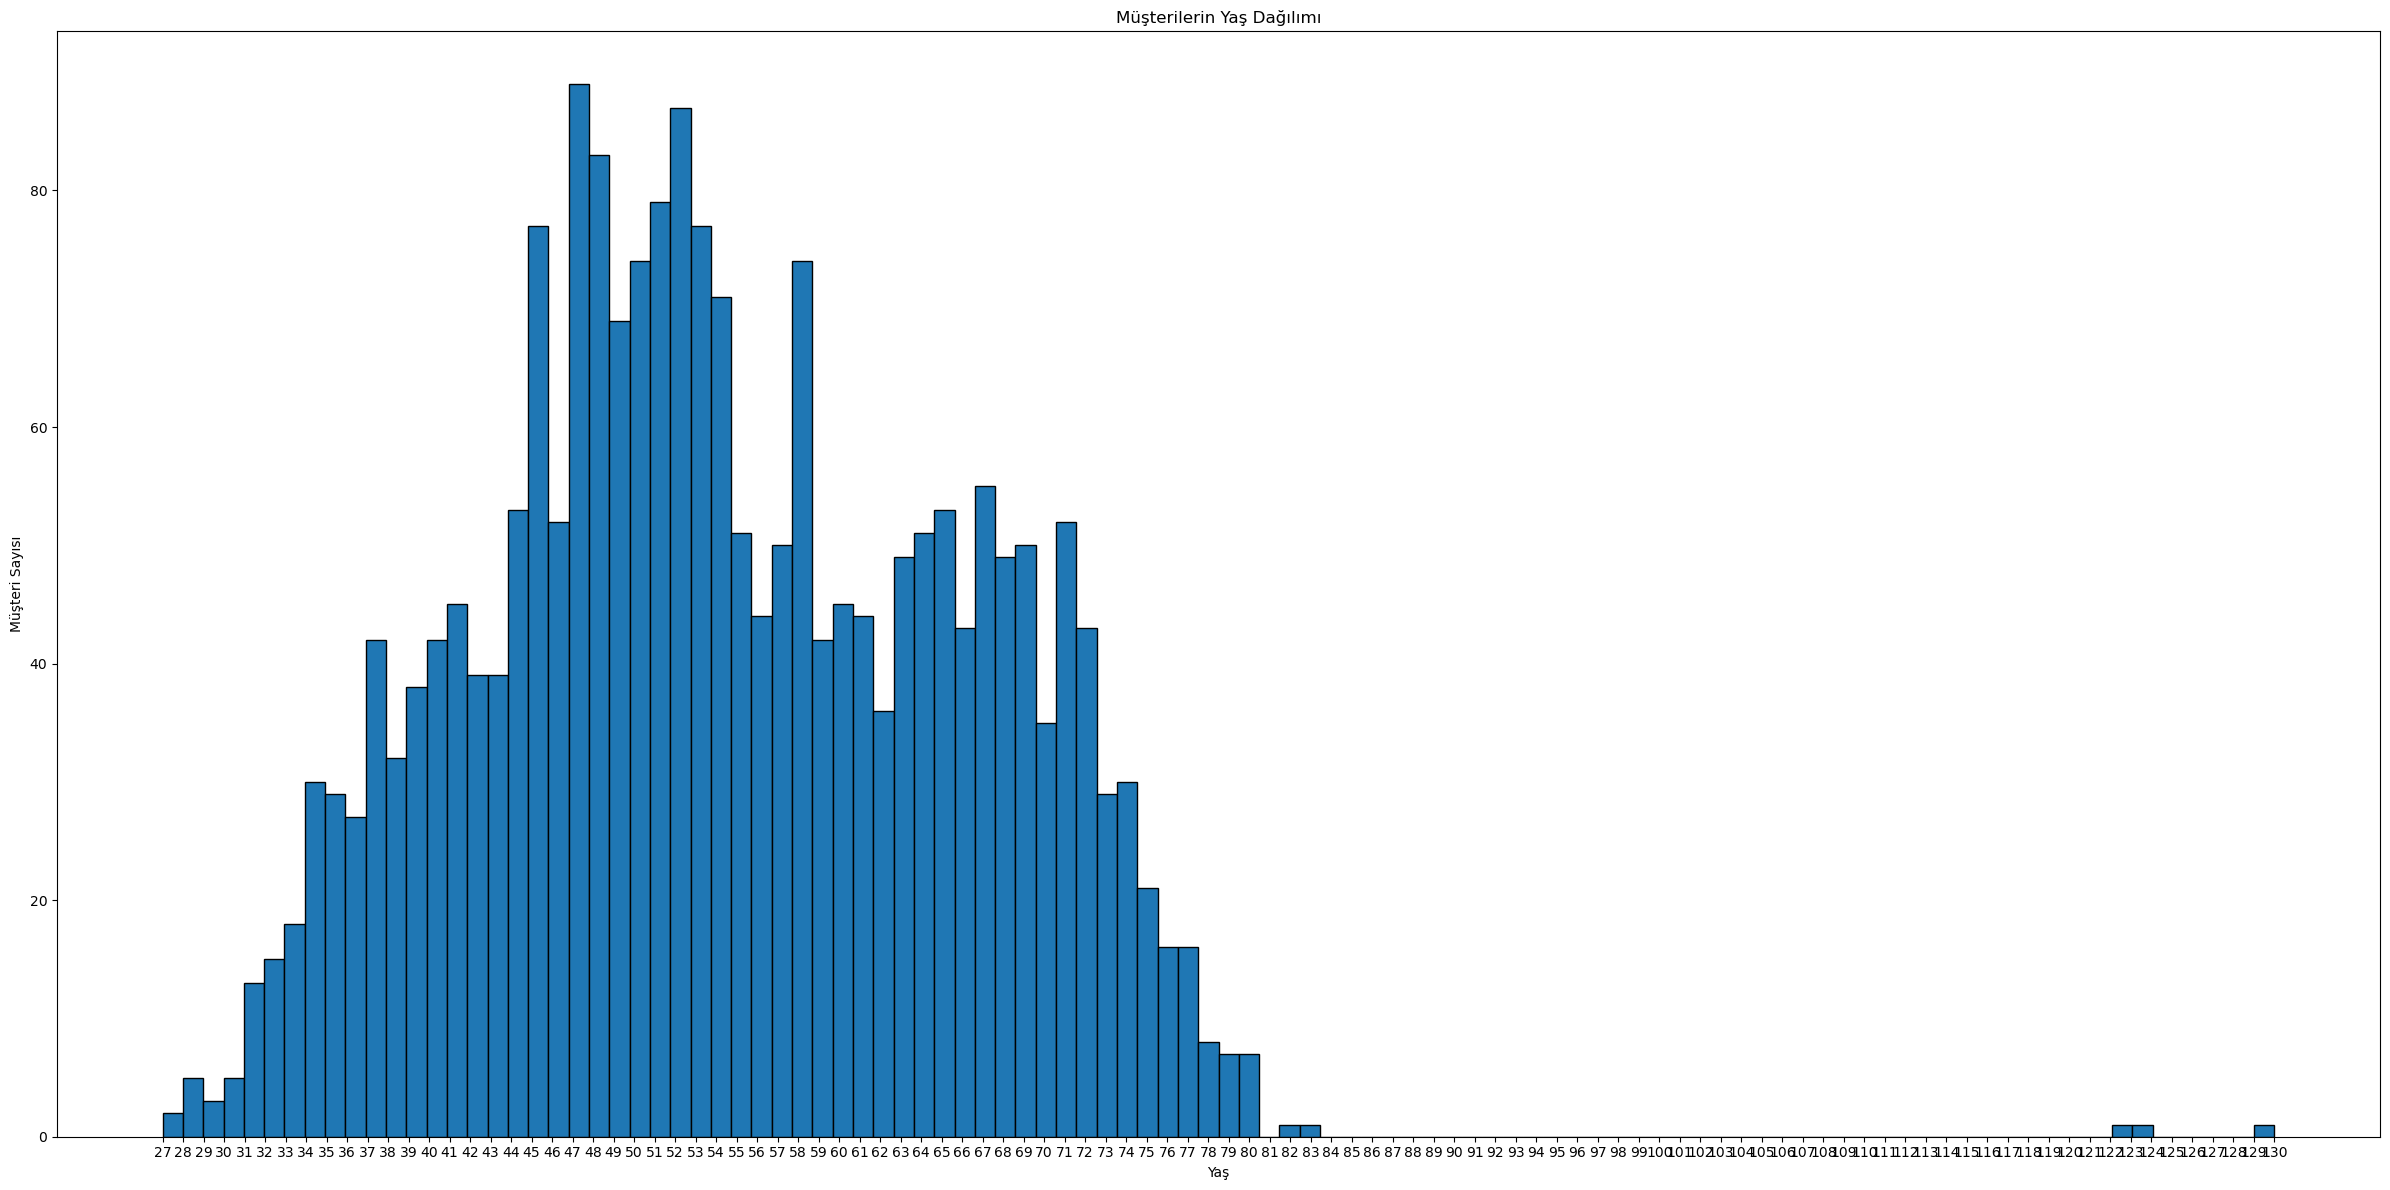

In [35]:
# Veri setinden minimum ve maksimum yaş değerlerini al
min_age = data['Age'].min()
max_age = data['Age'].max()

# Yaş dağılımını her yaş için gösteren bir histogram oluşturma
plt.figure(figsize=(24,12))
plt.hist(data['Age'], bins=(max_age-min_age+1), edgecolor='black', range=(min_age, max_age))
plt.title('Müşterilerin Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Müşteri Sayısı')
plt.xticks(range(min_age, max_age+1))
plt.tight_layout()
plt.show()

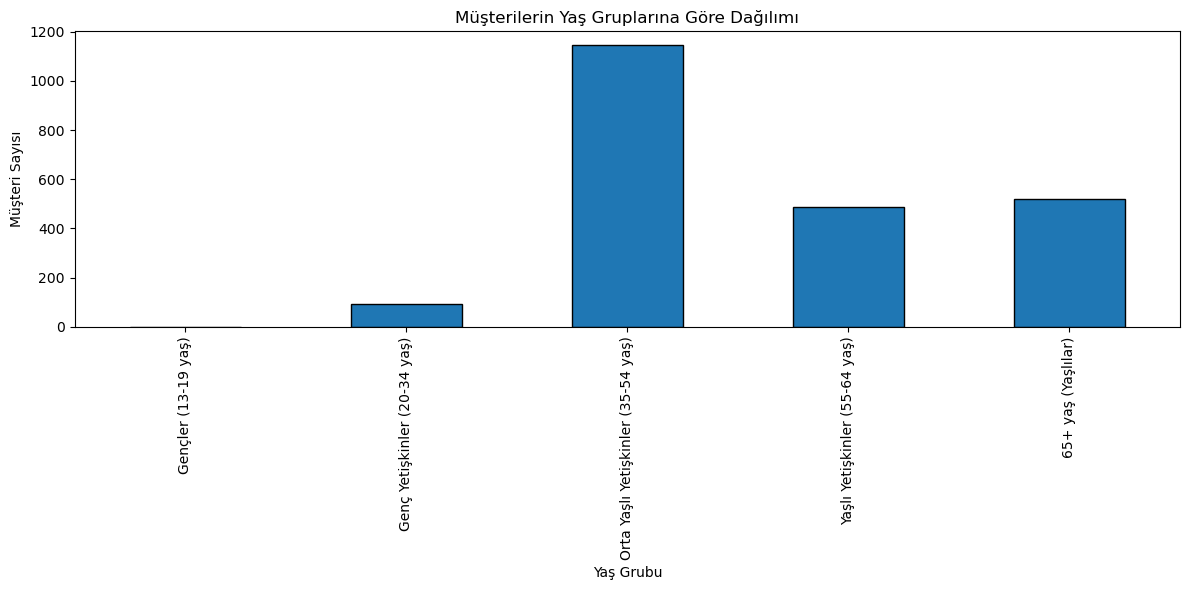

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Yaş gruplarına göre sınırlar ve etiketler
age_bins = [12, 19, 34, 54, 64, data['Age'].max()]
age_labels = ['Gençler (13-19 yaş)', 'Genç Yetişkinler (20-34 yaş)', 'Orta Yaşlı Yetişkinler (35-54 yaş)', 'Yaşlı Yetişkinler (55-64 yaş)', '65+ yaş (Yaşlılar)']

# Yaş gruplarına göre dağılımı hesaplama
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)

# Yaş gruplarına göre dağılımı gösteren bir bar grafik oluşturma
plt.figure(figsize=(12,6))
data['Age_Group'].value_counts().reindex(age_labels).plot(kind='bar', edgecolor='black')
plt.title('Müşterilerin Yaş Gruplarına Göre Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Müşteri Sayısı')
plt.tight_layout()
plt.show()

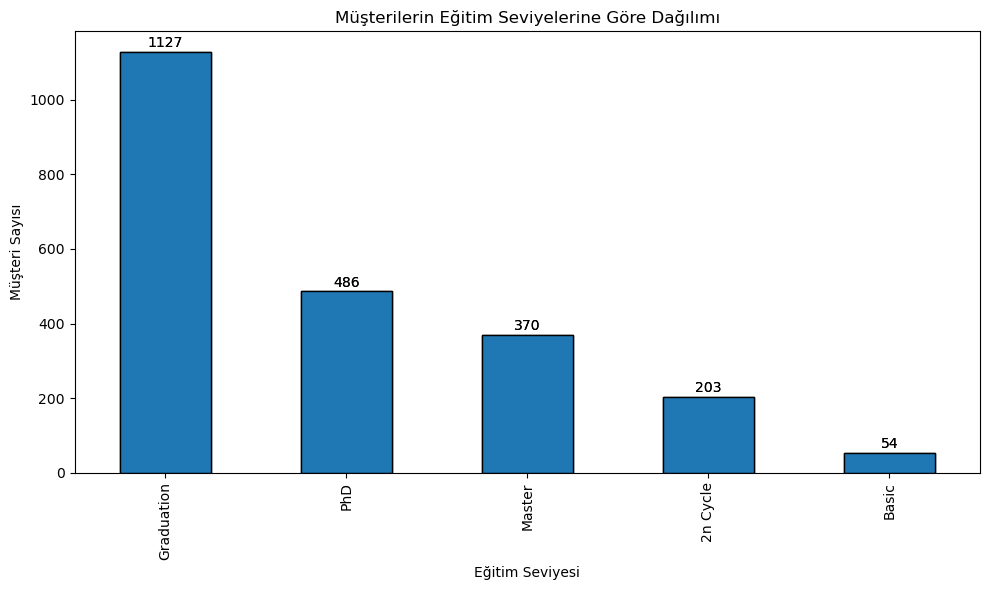

In [42]:
import matplotlib.pyplot as plt

# Eğitim seviyelerine göre müşteri sayısını hesaplama
education_counts = data['Education'].value_counts()

# Eğitim seviyelerine göre müşteri sayısını gösteren bir bar grafik oluşturma
plt.figure(figsize=(10,6))
education_counts.plot(kind='bar', edgecolor='black')
bars = education_counts.plot(kind='bar', edgecolor='black')
plt.title('Müşterilerin Eğitim Seviyelerine Göre Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Müşteri Sayısı')
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

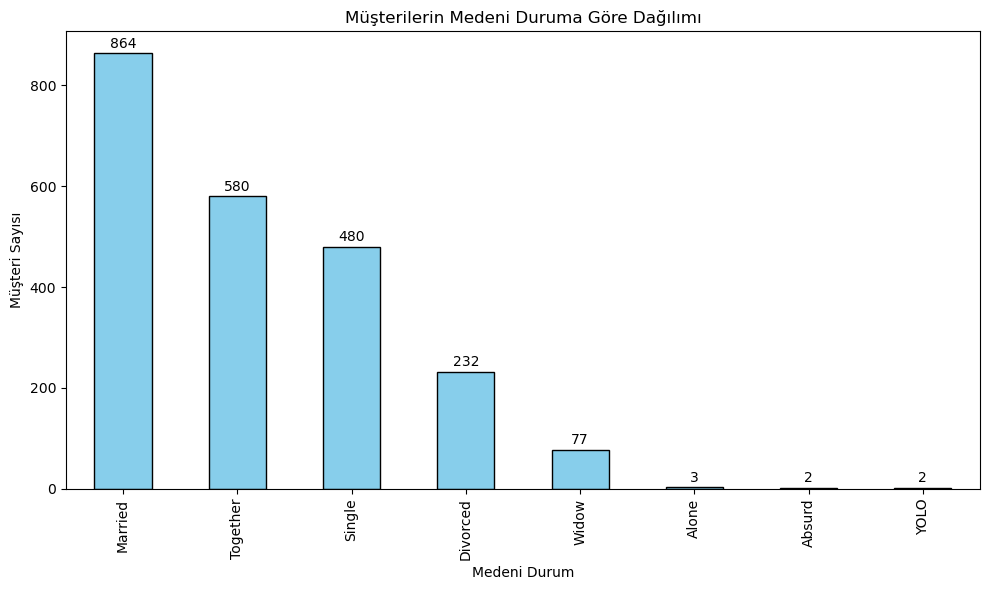

In [43]:
import matplotlib.pyplot as plt

# Medeni duruma göre müşteri sayısını hesaplama
marital_status_counts = data['Marital_Status'].value_counts()

# Medeni duruma göre müşteri sayısını gösteren bir bar grafik oluşturma
plt.figure(figsize=(10,6))
bars = marital_status_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Müşterilerin Medeni Duruma Göre Dağılımı')
plt.xlabel('Medeni Durum')
plt.ylabel('Müşteri Sayısı')

# Her sütunun üzerine müşteri adedinin yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

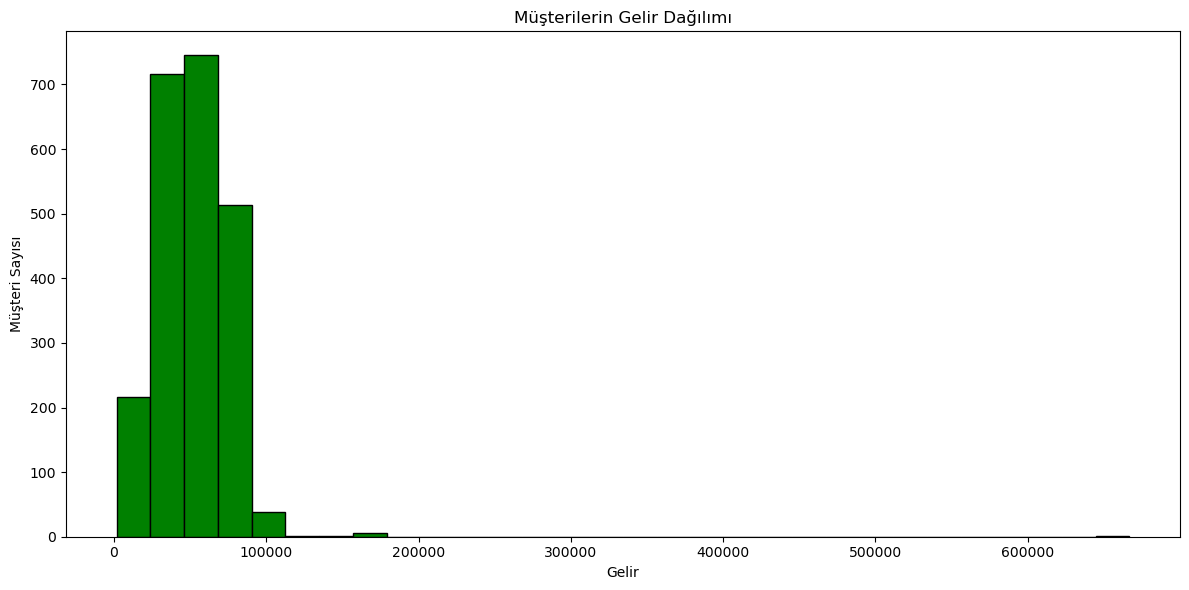

In [44]:
plt.figure(figsize=(12,6))
plt.hist(data['Income'].dropna(), bins=30, edgecolor='black', color='green')
plt.title('Müşterilerin Gelir Dağılımı')
plt.xlabel('Gelir')
plt.ylabel('Müşteri Sayısı')
plt.tight_layout()
plt.show()

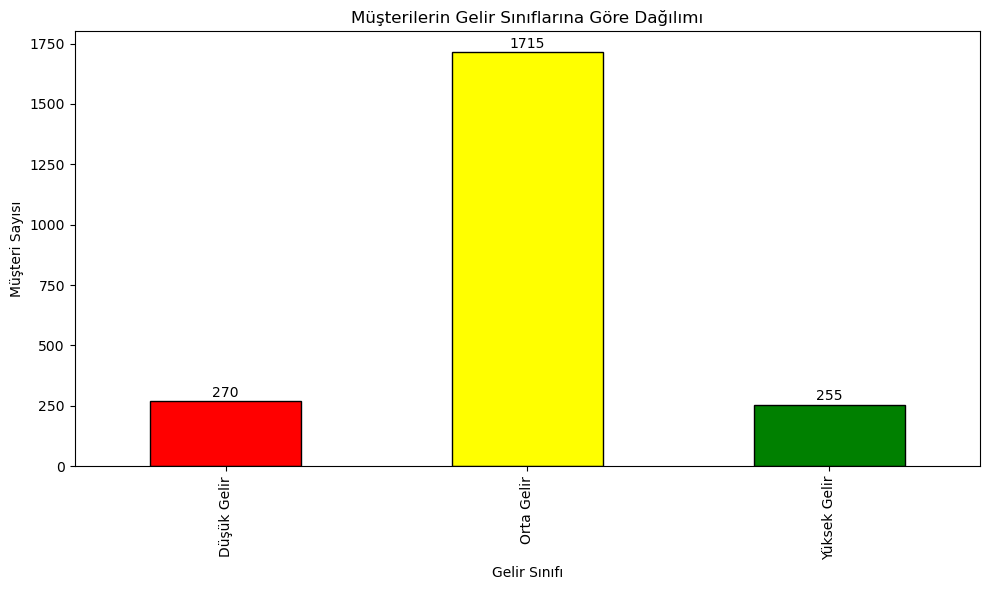

In [46]:
# Gelir sınıflarını tanımlama
bins = [0, 26200, 78500, data['Income'].max()]
labels = ['Düşük Gelir', 'Orta Gelir', 'Yüksek Gelir']

# Gelir sınıflarına göre müşteri sayısını hesaplama
data['Income_Class'] = pd.cut(data['Income'], bins=bins, labels=labels, right=True)

# Gelir sınıflarına göre müşteri sayısını gösteren bir bar grafik oluşturma
plt.figure(figsize=(10,6))
bars = data['Income_Class'].value_counts().reindex(labels).plot(kind='bar', edgecolor='black', color=['red', 'yellow', 'green'])
plt.title('Müşterilerin Gelir Sınıflarına Göre Dağılımı')
plt.xlabel('Gelir Sınıfı')
plt.ylabel('Müşteri Sayısı')

# Her sütunun üzerine müşteri adedinin yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

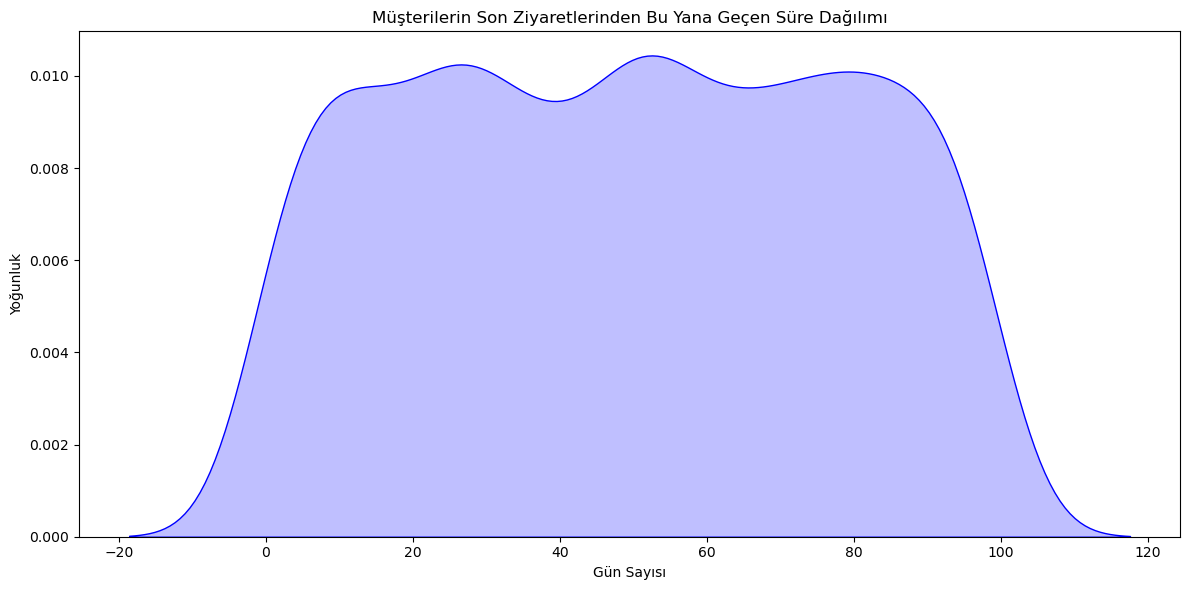

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.kdeplot(data['Recency'], shade=True, color='blue')
plt.title('Müşterilerin Son Ziyaretlerinden Bu Yana Geçen Süre Dağılımı')
plt.xlabel('Gün Sayısı')
plt.ylabel('Yoğunluk')
plt.tight_layout()
plt.show()

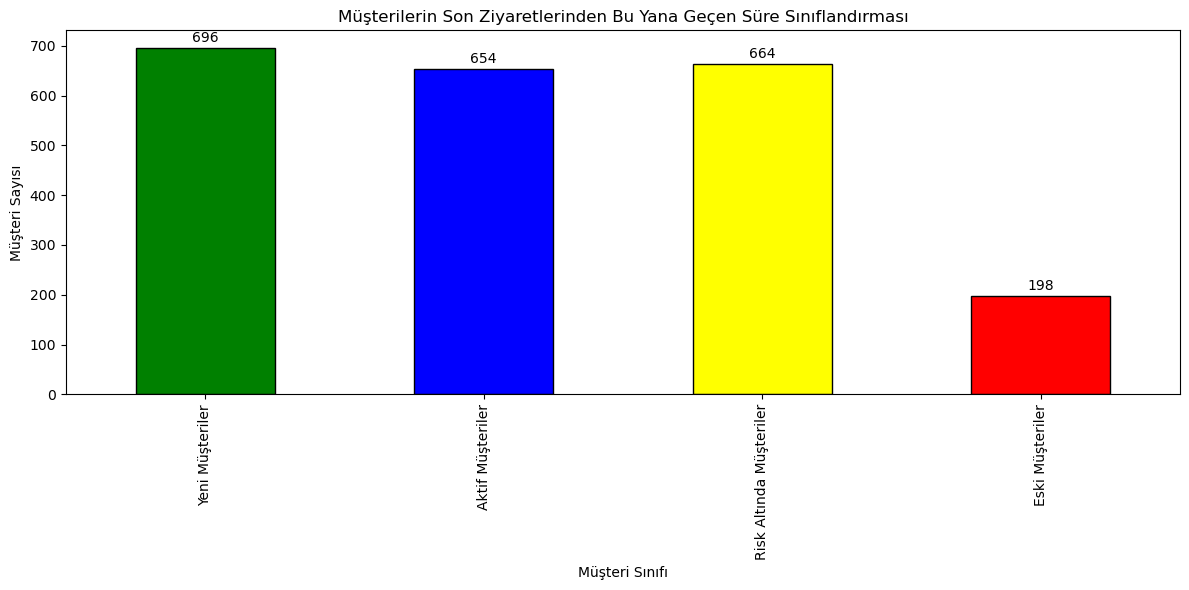

In [49]:
# Recency değerlerini sınıflandırma
bins = [0, 30, 60, 90, data['Recency'].max()]
labels = ['Yeni Müşteriler', 'Aktif Müşteriler', 'Risk Altında Müşteriler', 'Eski Müşteriler']
data['Recency_Class'] = pd.cut(data['Recency'], bins=bins, labels=labels, right=True)

# Recency sınıflarına göre müşteri sayısını gösteren bir bar grafik oluşturma
plt.figure(figsize=(12,6))
bars = data['Recency_Class'].value_counts().reindex(labels).plot(kind='bar', edgecolor='black', color=['green', 'blue', 'yellow', 'red'])
plt.title('Müşterilerin Son Ziyaretlerinden Bu Yana Geçen Süre Sınıflandırması')
plt.xlabel('Müşteri Sınıfı')
plt.ylabel('Müşteri Sayısı')

# Her sütunun üzerine müşteri adedinin yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [50]:
# 'Risk Altında Müşteriler' kategorisinde olan müşterileri filtreleme
risk_altinda_musteriler = data[data['Recency_Class'] == 'Risk Altında Müşteriler']

# Risk altındaki müşterilerin listesi
risk_altinda_musteriler

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Income_Class,Recency_Class
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,0,3.0,11.0,0,73,65+ yaş (Yaşlılar),Düşük Gelir,Risk Altında Müşteriler
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,...,0,0,0,3.0,11.0,0,64,Yaşlı Yetişkinler (55-64 yaş),Orta Gelir,Risk Altında Müşteriler
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,...,0,0,0,3.0,11.0,0,38,Orta Yaşlı Yetişkinler (35-54 yaş),Orta Gelir,Risk Altında Müşteriler
22,1993,1949,PhD,Married,58607.0,0,1,2012-12-23,63,867,...,0,0,0,3.0,11.0,0,74,65+ yaş (Yaşlılar),Orta Gelir,Risk Altında Müşteriler
24,1409,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,...,0,0,0,3.0,11.0,0,72,65+ yaş (Yaşlılar),Orta Gelir,Risk Altında Müşteriler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,6261,1979,Graduation,Married,58025.0,0,1,2013-11-26,81,270,...,0,0,0,3.0,11.0,0,44,Orta Yaşlı Yetişkinler (35-54 yaş),Orta Gelir,Risk Altında Müşteriler
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,0,0,0,3.0,11.0,0,44,Orta Yaşlı Yetişkinler (35-54 yaş),Orta Gelir,Risk Altında Müşteriler
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,0,0,0,3.0,11.0,0,39,Orta Yaşlı Yetişkinler (35-54 yaş),Düşük Gelir,Risk Altında Müşteriler
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,0,0,0,3.0,11.0,0,53,Orta Yaşlı Yetişkinler (35-54 yaş),Orta Gelir,Risk Altında Müşteriler


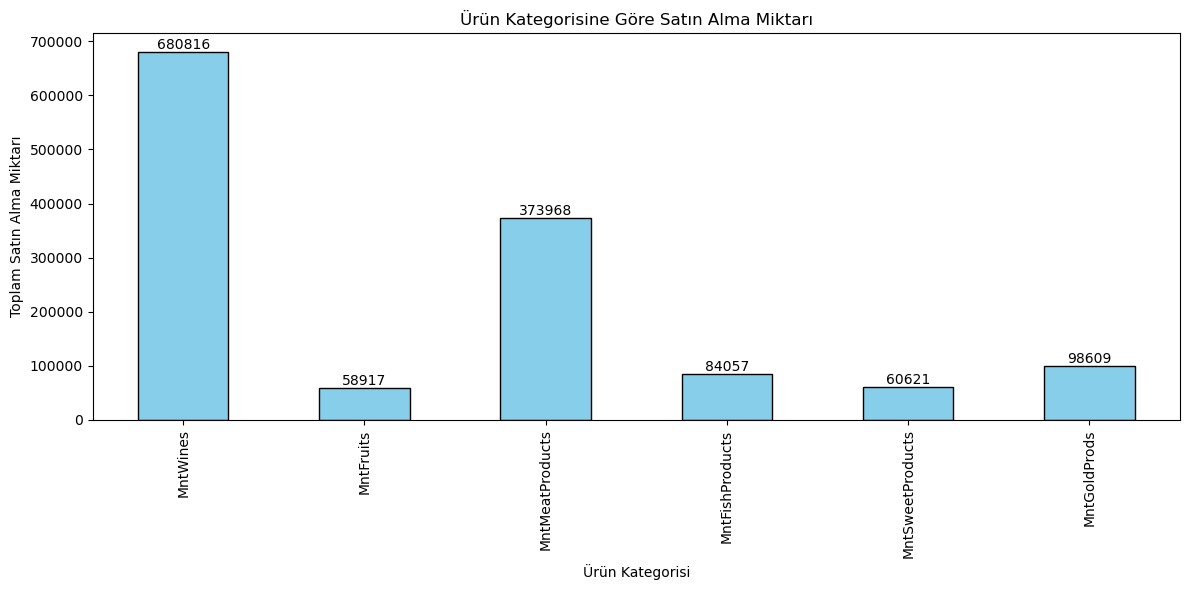

In [51]:
# Ürün kategorilerine göre toplam satın alma miktarını hesaplama
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = data[product_columns].sum()

# Ürün kategorilerine göre toplam satın alma miktarını gösteren bir bar grafiği oluşturma
plt.figure(figsize=(12,6))
bars = product_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ürün Kategorisine Göre Satın Alma Miktarı')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Toplam Satın Alma Miktarı')

# Her sütunun üzerine toplam satın alma miktarının yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

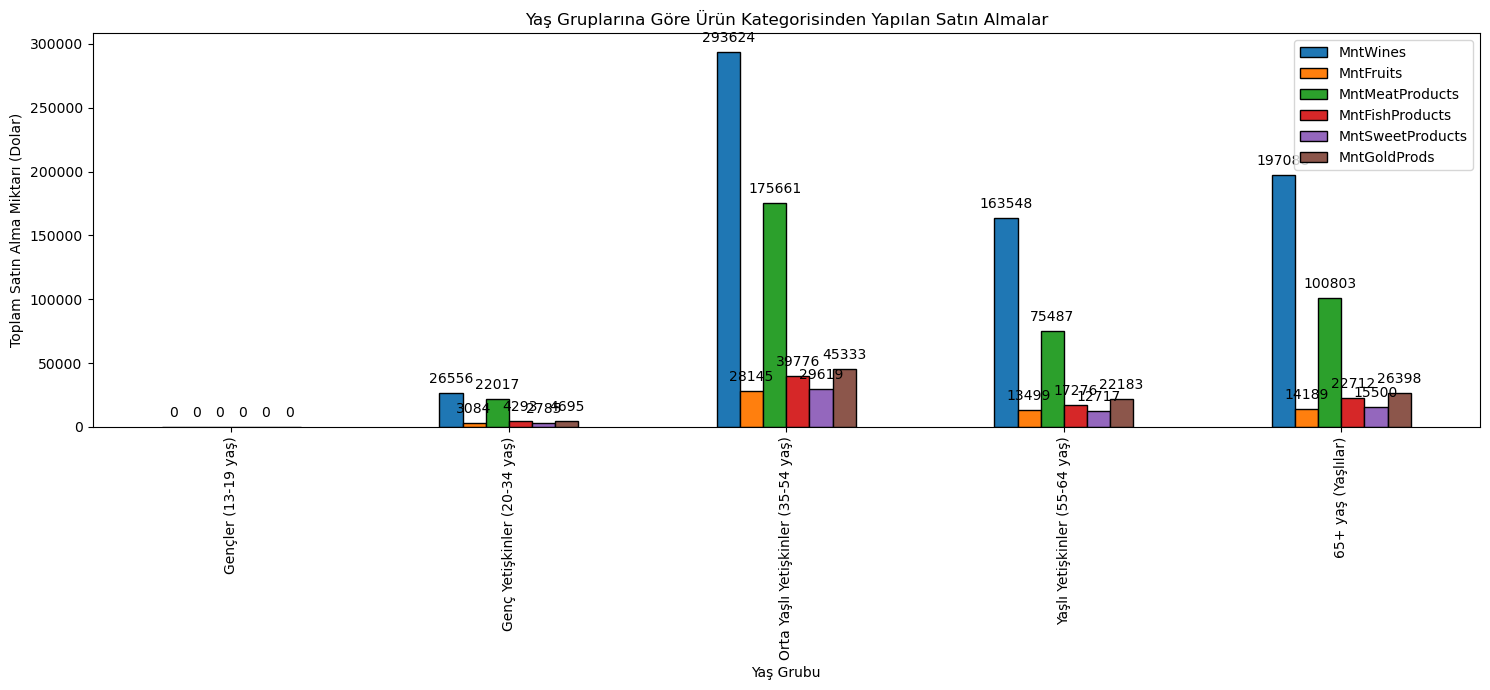

In [55]:
# Mevcut yılı belirleme
current_year = 2023

# Müşterilerin yaşlarını hesaplama
data['Age'] = current_year - data['Year_Birth']

# Yaşları belirtilen gruplara ayırma
bins = [13, 19, 34, 54, 64, data['Age'].max()]
labels = ['Gençler (13-19 yaş)', 'Genç Yetişkinler (20-34 yaş)', 'Orta Yaşlı Yetişkinler (35-54 yaş)', 'Yaşlı Yetişkinler (55-64 yaş)', '65+ yaş (Yaşlılar)']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

# Yaş gruplarına göre ürün kategorilerinden yapılan toplam satın almaları hesaplama
age_group_product_totals = data.groupby('Age_Group')[product_columns].sum()

# Yaş gruplarına göre ürün kategorilerinden yapılan toplam satın almaları gösteren bir bar grafiği oluşturma
fig, ax = plt.subplots(figsize=(15,7))
age_group_product_totals.plot(kind='bar', edgecolor='black', ax=ax)
plt.title('Yaş Gruplarına Göre Ürün Kategorisinden Yapılan Satın Almalar')
plt.xlabel('Yaş Grubu')
plt.ylabel('Toplam Satın Alma Miktarı (Dolar)')

# Sütunların üzerine miktarların yazılması
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

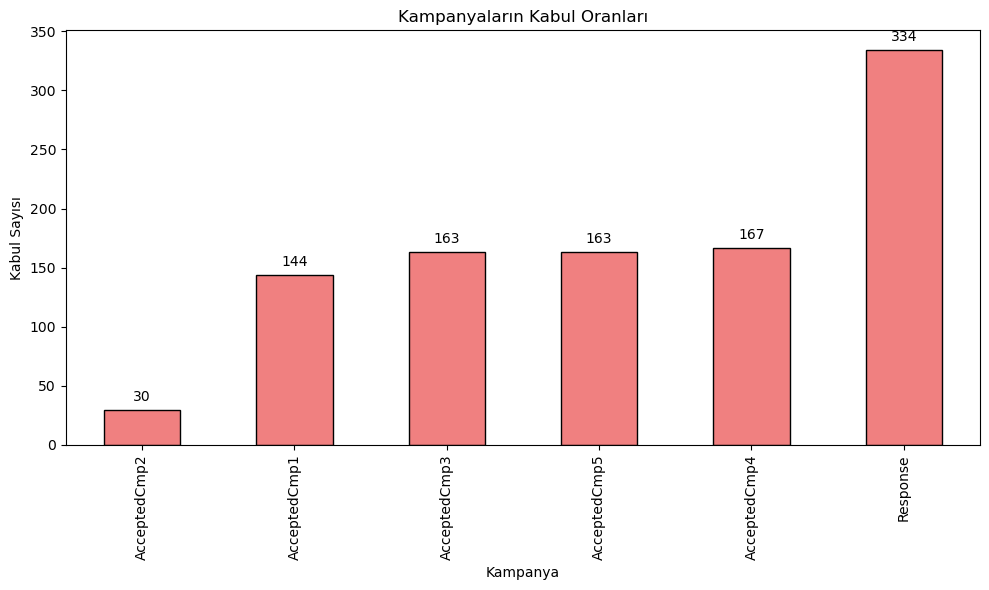

In [57]:
# Kampanyaların kabul oranlarını hesaplama
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_totals = data[campaign_columns].sum()

# Kampanyaların kabul oranlarını gösteren bir bar grafiği oluşturma
plt.figure(figsize=(10,6))
bars = campaign_totals.sort_values().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Kampanyaların Kabul Oranları')
plt.xlabel('Kampanya')
plt.ylabel('Kabul Sayısı')

# Her sütunun üzerine kabul sayısının yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 1500x700 with 0 Axes>

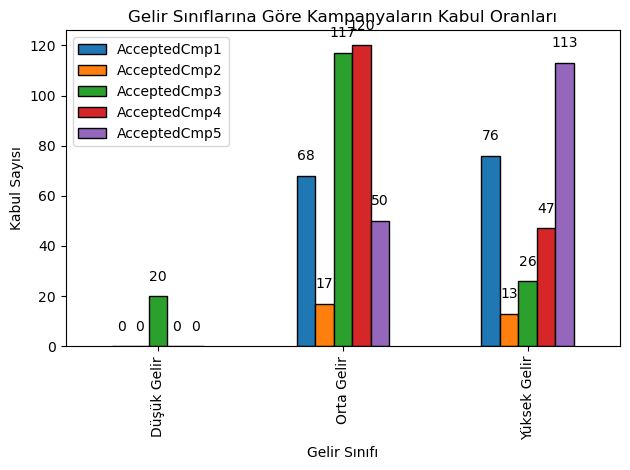

In [59]:
# Gelir sınıflarını tanımlama
bins = [0, 26200, 78500, data['Income'].max()]
labels = ['Düşük Gelir', 'Orta Gelir', 'Yüksek Gelir']
data['Income_Group'] = pd.cut(data['Income'], bins=bins, labels=labels, right=True)

# Gelir sınıflarına göre kampanyaların kabul oranlarını hesaplama
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_by_income = data.groupby('Income_Group')[campaign_columns].sum()

# Gelir sınıflarına göre kampanyaların kabul oranlarını gösteren bir bar grafiği oluşturma
plt.figure(figsize=(15,7))
bars = campaign_by_income.plot(kind='bar', edgecolor='black')
plt.title('Gelir Sınıflarına Göre Kampanyaların Kabul Oranları')
plt.xlabel('Gelir Sınıfı')
plt.ylabel('Kabul Sayısı')

# Her sütunun üzerine kabul sayısının yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

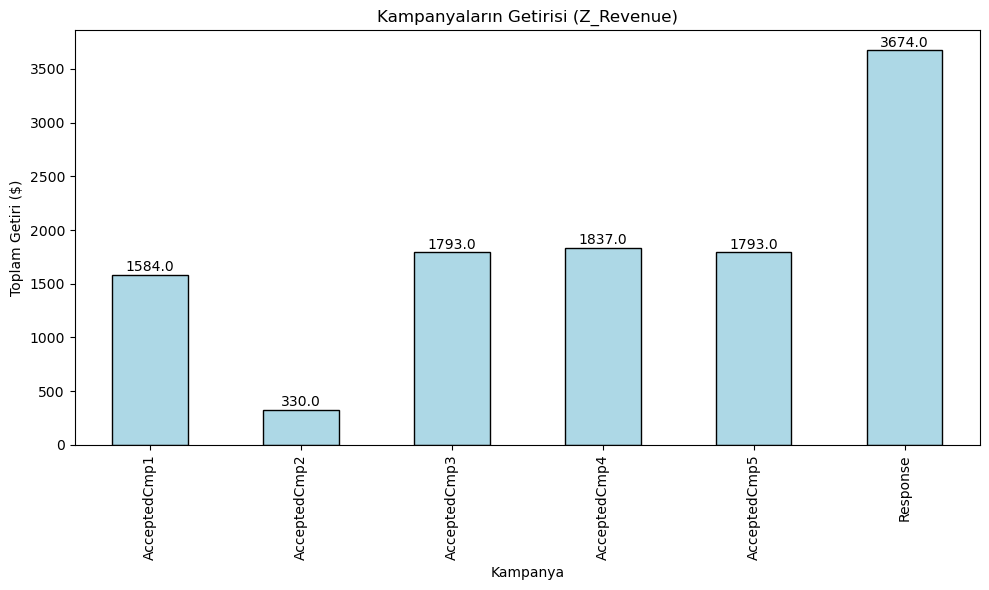

In [61]:
# Kampanyaların getirisini hesaplama
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
campaign_revenues = data[campaign_columns].multiply(data['Z_Revenue'], axis=0).sum()

# Kampanyaların getirisini gösteren bir bar grafiği oluşturma
plt.figure(figsize=(10,6))
bars = campaign_revenues.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Kampanyaların Getirisi (Z_Revenue)')
plt.xlabel('Kampanya')
plt.ylabel('Toplam Getiri ($)')

# Her sütunun üzerine getiri miktarının yazılması
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

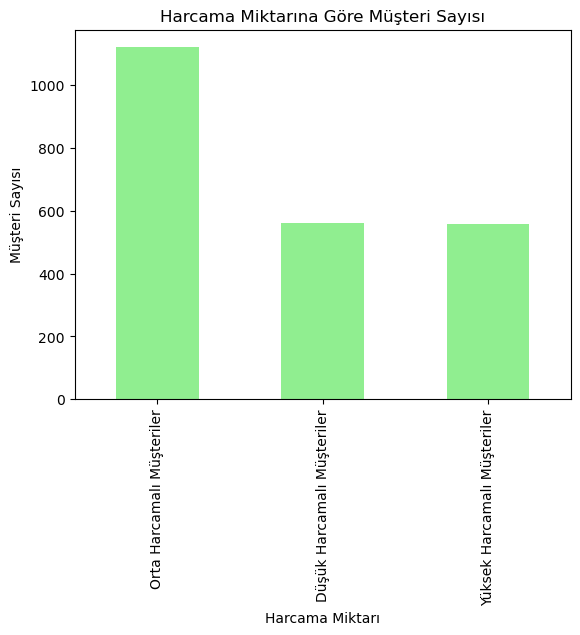

In [62]:
# Harcama Miktarı Analizi
data['TotalSpent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
spend_bins = [0, data['TotalSpent'].quantile(0.25), data['TotalSpent'].quantile(0.75), data['TotalSpent'].max()]
spend_labels = ['Düşük Harcamalı Müşteriler', 'Orta Harcamalı Müşteriler', 'Yüksek Harcamalı Müşteriler']
data['SpendSegment'] = pd.cut(data['TotalSpent'], bins=spend_bins, labels=spend_labels, right=False)
spend_analysis = data['SpendSegment'].value_counts()
spend_analysis.plot(kind='bar', color='lightgreen')
plt.title('Harcama Miktarına Göre Müşteri Sayısı')
plt.xlabel('Harcama Miktarı')
plt.ylabel('Müşteri Sayısı')
plt.show()

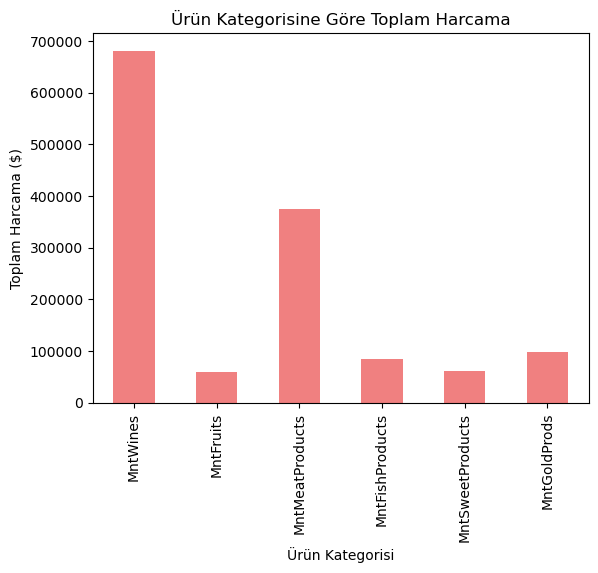

In [63]:
# Ürün Tercihi Analizi
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_spends = data[product_columns].sum()
product_spends.plot(kind='bar', color='lightcoral')
plt.title('Ürün Kategorisine Göre Toplam Harcama')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Toplam Harcama ($)')
plt.show()

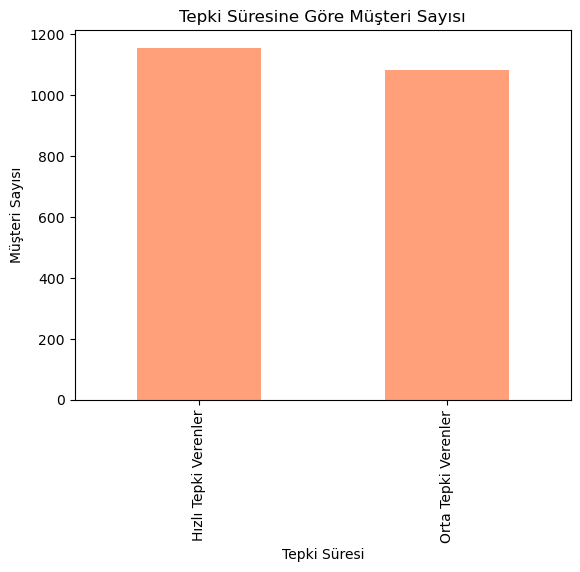

In [67]:
# Tepki Süresi Analizi
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
max_date = data['Dt_Customer'].max()
data['DaysSinceEnrollment'] = (max_date - data['Dt_Customer']).dt.days

# Maksimum gün sayısını belirleyin
max_days = data['DaysSinceEnrollment'].max()

# Eğer maksimum gün sayısı 730'dan büyükse, 730 kullanın. Aksi halde, maksimum gün sayısını kullanın.
second_bin = 730 if max_days > 730 else max_days

# Yineleyen değerleri kaldırın
days_bins = sorted(list(set([0, 365, second_bin, max_days])))
days_labels = ['Hızlı Tepki Verenler', 'Orta Tepki Verenler', 'Yavaş Tepki Verenler'][:len(days_bins)-1]
data['ResponseSegment'] = pd.cut(data['DaysSinceEnrollment'], bins=days_bins, labels=days_labels, right=False)
response_analysis = data['ResponseSegment'].value_counts()
response_analysis.plot(kind='bar', color='lightsalmon')
plt.title('Tepki Süresine Göre Müşteri Sayısı')
plt.xlabel('Tepki Süresi')
plt.ylabel('Müşteri Sayısı')
plt.show()

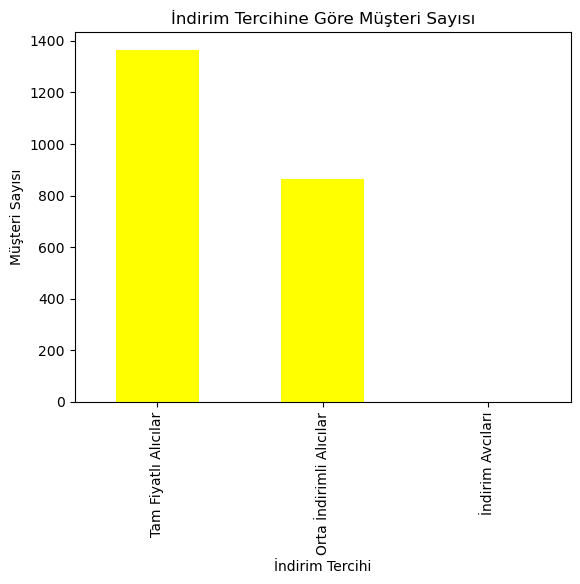

In [70]:
# İndirim Tercihi Analizi
discount_ratio = data['NumDealsPurchases'] / data[['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases']].sum(axis=1)
discount_bins = [0, 0.25, 0.75, 1]
discount_labels = ['Tam Fiyatlı Alıcılar', 'Orta İndirimli Alıcılar', 'İndirim Avcıları']
data['DiscountSegment'] = pd.cut(discount_ratio, bins=discount_bins, labels=discount_labels, right=False)
discount_analysis = data['DiscountSegment'].value_counts()
discount_analysis.plot(kind='bar', color='yellow')
plt.title('İndirim Tercihine Göre Müşteri Sayısı')
plt.xlabel('İndirim Tercihi')
plt.ylabel('Müşteri Sayısı')
plt.show()

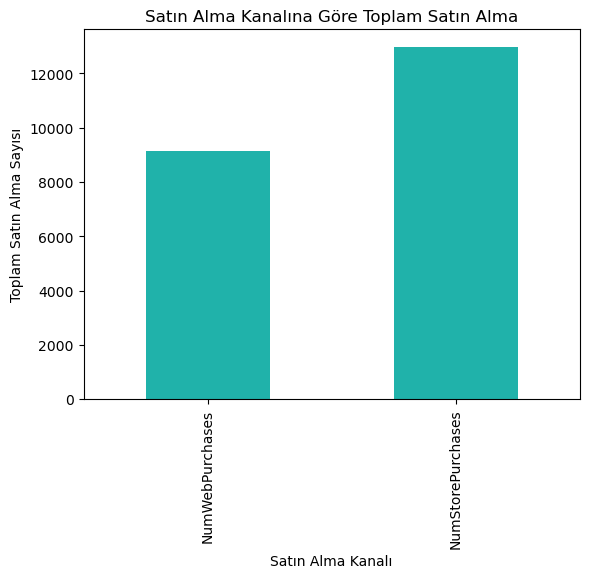

In [71]:
# Satın Alma Kanalı Analizi
channel_columns = ['NumWebPurchases', 'NumStorePurchases']
channel_purchases = data[channel_columns].sum()
channel_purchases.plot(kind='bar', color='lightseagreen')
plt.title('Satın Alma Kanalına Göre Toplam Satın Alma')
plt.xlabel('Satın Alma Kanalı')
plt.ylabel('Toplam Satın Alma Sayısı')
plt.show()

In [75]:
# Toplam Gelir
total_income_by_age = data.groupby('Age_Group')['Income'].sum()
total_income_by_income_group = data.groupby('Income_Class')['Income'].sum()

# Satın Alma Sıklığı
purchase_frequency_by_age = data.groupby('Age_Group').size()
purchase_frequency_by_income_group = data.groupby('Income_Class').size()

# Müşteri Sadakati (ortalama üyelik süresi olarak)
loyalty_by_age = data.groupby('Age_Group')['DaysSinceEnrollment'].mean()
loyalty_by_income_group = data.groupby('Income_Class')['DaysSinceEnrollment'].mean()

# Ortalama Sepet Değeri (Ortalama gelir olarak)
avg_basket_value_by_age = data.groupby('Age_Group')['Income'].mean()
avg_basket_value_by_income_group = data.groupby('Income_Class')['Income'].mean()

# Sonuçları yazdırma
print("Toplam Gelir (Yaş Grubuna Göre):\n", total_income_by_age)
print("\nToplam Gelir (Gelir Grubuna Göre):\n", total_income_by_income_group)
print("\nSatın Alma Sıklığı (Yaş Grubuna Göre):\n", purchase_frequency_by_age)
print("\nSatın Alma Sıklığı (Gelir Grubuna Göre):\n", purchase_frequency_by_income_group)
print("\nMüşteri Sadakati (Yaş Grubuna Göre):\n", loyalty_by_age)
print("\nMüşteri Sadakati (Gelir Grubuna Göre):\n", loyalty_by_income_group)
print("\nOrtalama Sepet Değeri (Yaş Grubuna Göre):\n", avg_basket_value_by_age)
print("\nOrtalama Sepet Değeri (Gelir Grubuna Göre):\n", avg_basket_value_by_income_group)

Toplam Gelir (Yaş Grubuna Göre):
 Age_Group
Gençler (13-19 yaş)                   0.000000e+00
Genç Yetişkinler (20-34 yaş)          4.502999e+06
Orta Yaşlı Yetişkinler (35-54 yaş)    5.601762e+07
Yaşlı Yetişkinler (55-64 yaş)         2.637114e+07
65+ yaş (Yaşlılar)                    3.014209e+07
Name: Income, dtype: float64

Toplam Gelir (Gelir Grubuna Göre):
 Income_Class
Düşük Gelir     5.149410e+06
Orta Gelir      8.915703e+07
Yüksek Gelir    2.272741e+07
Name: Income, dtype: float64

Satın Alma Sıklığı (Yaş Grubuna Göre):
 Age_Group
Gençler (13-19 yaş)                      0
Genç Yetişkinler (20-34 yaş)            91
Orta Yaşlı Yetişkinler (35-54 yaş)    1144
Yaşlı Yetişkinler (55-64 yaş)          486
65+ yaş (Yaşlılar)                     519
dtype: int64

Satın Alma Sıklığı (Gelir Grubuna Göre):
 Income_Class
Düşük Gelir      270
Orta Gelir      1715
Yüksek Gelir     255
dtype: int64

Müşteri Sadakati (Yaş Grubuna Göre):
 Age_Group
Gençler (13-19 yaş)                          N

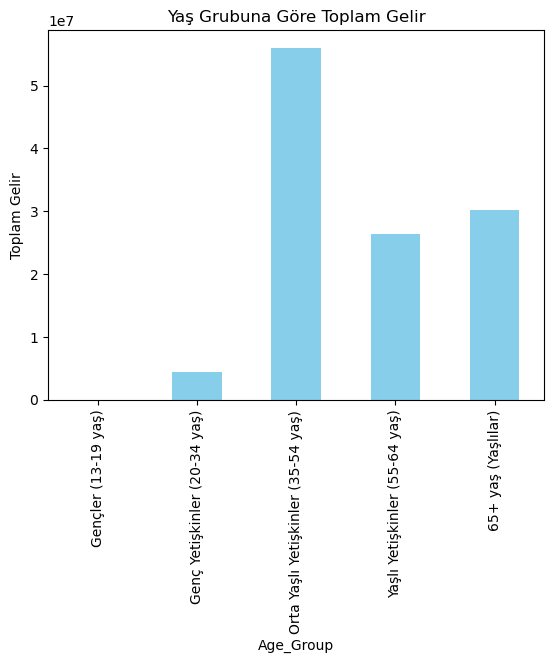

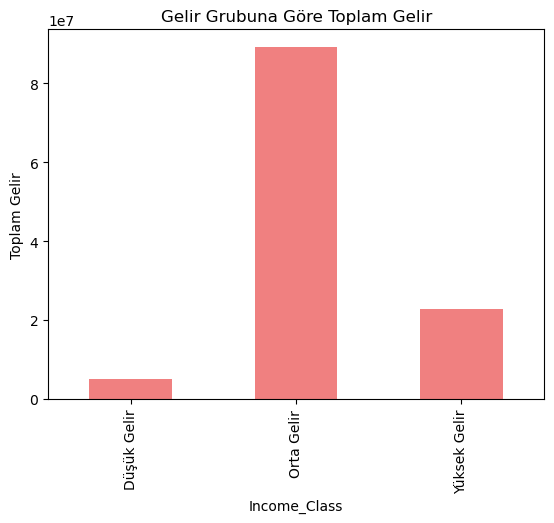

In [76]:
# Yaş Grubuna Göre Toplam Gelir Grafiği
total_income_by_age.plot(kind='bar', title='Yaş Grubuna Göre Toplam Gelir', color='skyblue')
plt.ylabel('Toplam Gelir')
plt.show()

# Gelir Grubuna Göre Toplam Gelir Grafiği
total_income_by_income_group.plot(kind='bar', title='Gelir Grubuna Göre Toplam Gelir', color='lightcoral')
plt.ylabel('Toplam Gelir')
plt.show()

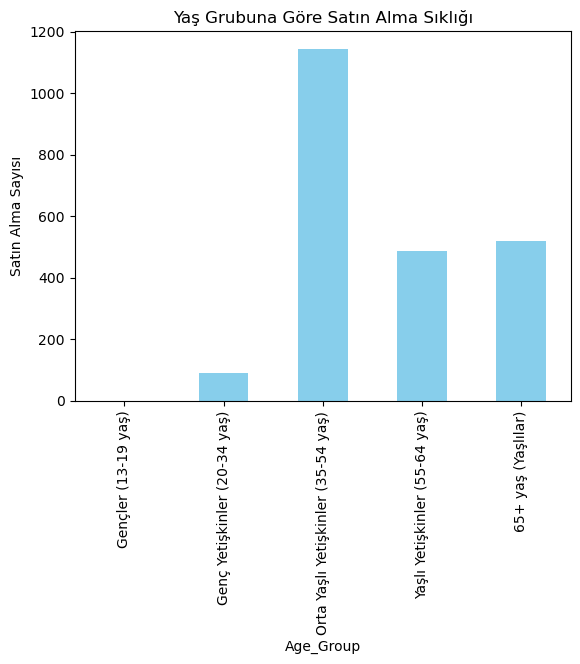

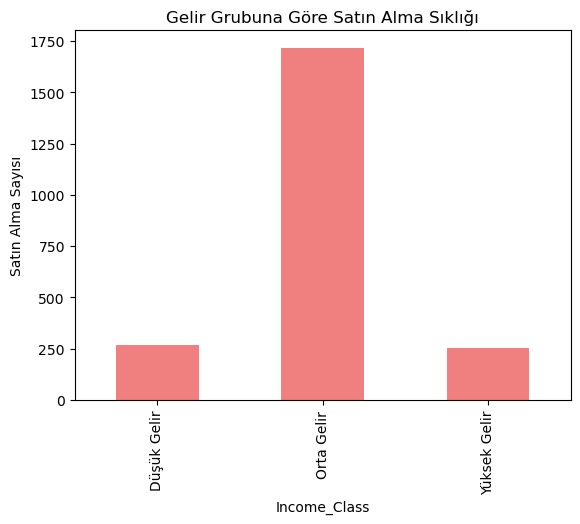

In [77]:
# Yaş Grubuna Göre Satın Alma Sıklığı Grafiği
purchase_frequency_by_age.plot(kind='bar', title='Yaş Grubuna Göre Satın Alma Sıklığı', color='skyblue')
plt.ylabel('Satın Alma Sayısı')
plt.show()

# Gelir Grubuna Göre Satın Alma Sıklığı Grafiği
purchase_frequency_by_income_group.plot(kind='bar', title='Gelir Grubuna Göre Satın Alma Sıklığı', color='lightcoral')
plt.ylabel('Satın Alma Sayısı')
plt.show()

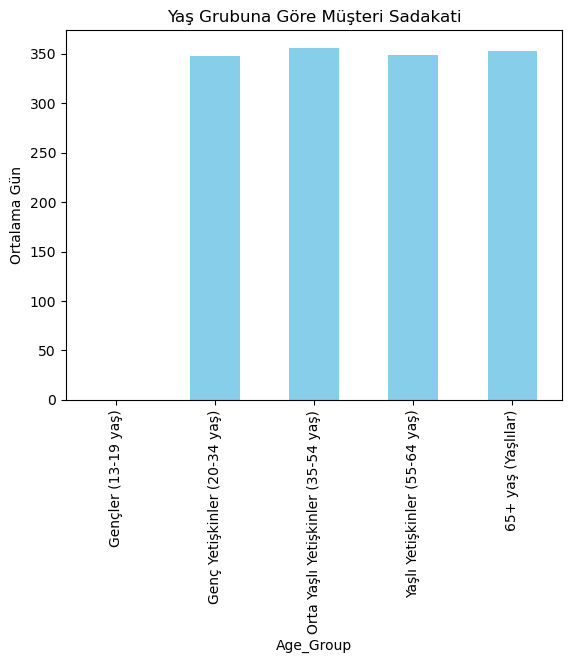

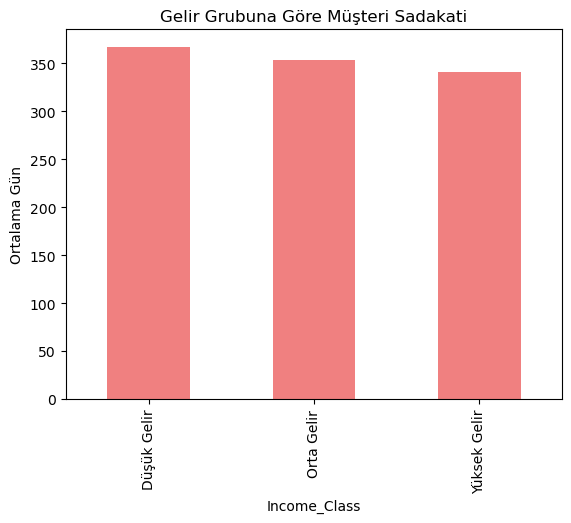

In [78]:
# Yaş Grubuna Göre Müşteri Sadakati Grafiği
loyalty_by_age.plot(kind='bar', title='Yaş Grubuna Göre Müşteri Sadakati', color='skyblue')
plt.ylabel('Ortalama Gün')
plt.show()

# Gelir Grubuna Göre Müşteri Sadakati Grafiği
loyalty_by_income_group.plot(kind='bar', title='Gelir Grubuna Göre Müşteri Sadakati', color='lightcoral')
plt.ylabel('Ortalama Gün')
plt.show()

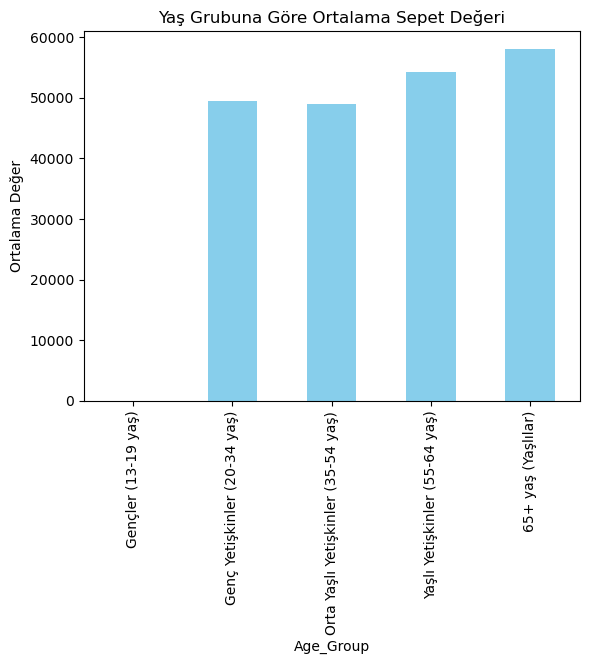

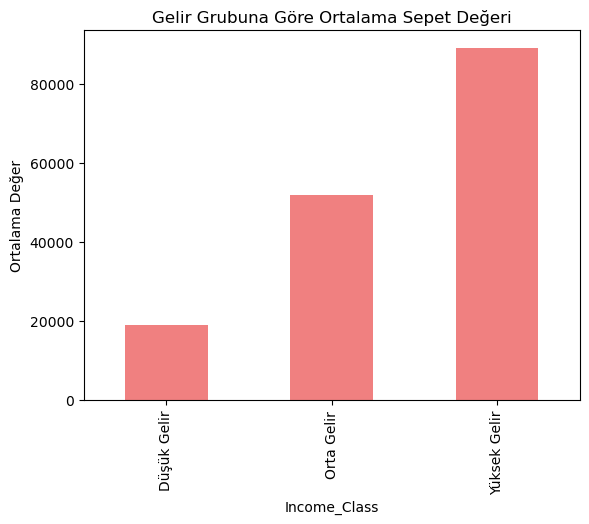

In [80]:
# Yaş Grubuna Göre Ortalama Sepet Değeri Grafiği
avg_basket_value_by_age.plot(kind='bar', title='Yaş Grubuna Göre Ortalama Sepet Değeri', color='skyblue')
plt.ylabel('Ortalama Değer')
plt.show()

# Gelir Grubuna Göre Ortalama Sepet Değeri Grafiği
avg_basket_value_by_income_group.plot(kind='bar', title='Gelir Grubuna Göre Ortalama Sepet Değeri', color='lightcoral')
plt.ylabel('Ortalama Değer')
plt.show()

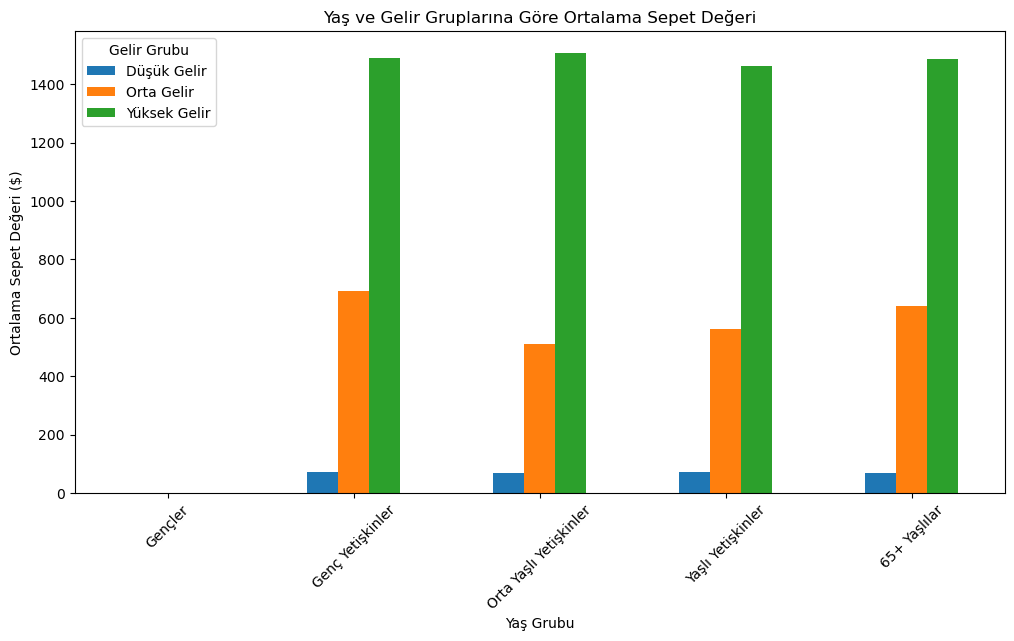

In [81]:
# 1. Adım: Tüm satın alma işlemleri için harcanan toplam miktarı hesapla.
# (Bu adımda, veri setindeki tüm ürün kategorilerini dikkate alarak toplam harcamayı hesaplıyoruz.)
data['TotalPurchase'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# 2. Adım: Her müşteri için ortalama sepet değerini hesapla.
average_basket_value = data.groupby('ID')['TotalPurchase'].mean()

# 3. Adım: Ortalama değerleri yaş ve gelir gruplarına göre grupla ve tekrar ortalama al.
data['Age'] = current_year - data['Year_Birth']
data['AgeGroup'] = pd.cut(data['Age'], bins=[13, 19, 34, 54, 64, 120], labels=['Gençler', 'Genç Yetişkinler', 'Orta Yaşlı Yetişkinler', 'Yaşlı Yetişkinler', '65+ Yaşlılar'])
data['IncomeGroup'] = pd.cut(data['Income'], bins=[0, 26200, 78500, float('inf')], labels=['Düşük Gelir', 'Orta Gelir', 'Yüksek Gelir'])

avg_basket_by_age_income = data.groupby(['AgeGroup', 'IncomeGroup'])['TotalPurchase'].mean().unstack()

# 4. Adım: Sonuçları görselleştir.
avg_basket_by_age_income.plot(kind='bar', figsize=(12, 6))
plt.title('Yaş ve Gelir Gruplarına Göre Ortalama Sepet Değeri')
plt.ylabel('Ortalama Sepet Değeri ($)')
plt.xlabel('Yaş Grubu')
plt.xticks(rotation=45)
plt.legend(title='Gelir Grubu')
plt.show()

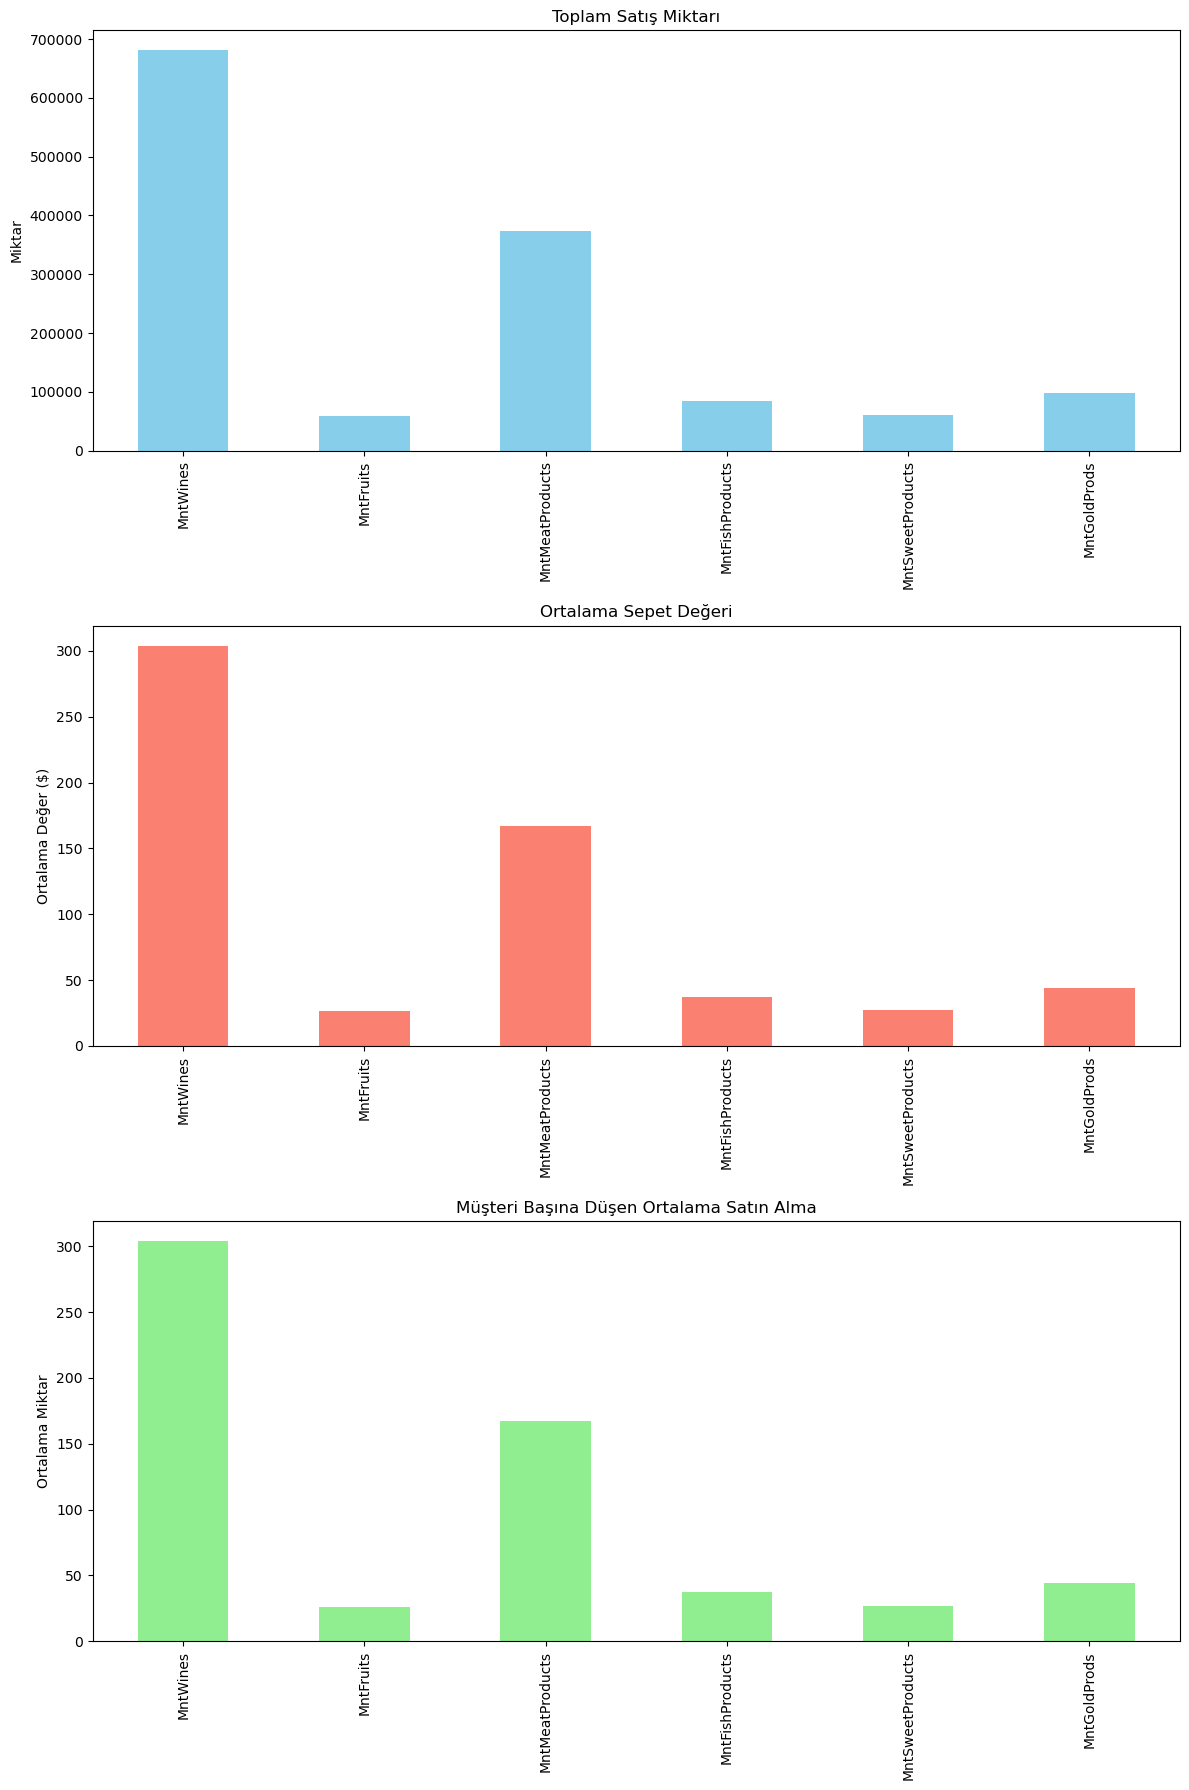

In [82]:
# Ürün kategorilerini bir liste içerisinde sakla
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# 1. Toplam Satış Miktarı
total_sales = data[product_columns].sum()

# 2. Ortalama Sepet Değeri
average_basket_value_per_product = data[product_columns].mean()

# 3. Müşteri Başına Düşen Ortalama Satın Alma
average_purchase_per_customer = data[product_columns].sum() / data['ID'].nunique()

# Sonuçları görselleştir
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

total_sales.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Toplam Satış Miktarı')
axes[0].set_ylabel('Miktar')

average_basket_value_per_product.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Ortalama Sepet Değeri')
axes[1].set_ylabel('Ortalama Değer ($)')

average_purchase_per_customer.plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Müşteri Başına Düşen Ortalama Satın Alma')
axes[2].set_ylabel('Ortalama Miktar')

plt.tight_layout()
plt.show()

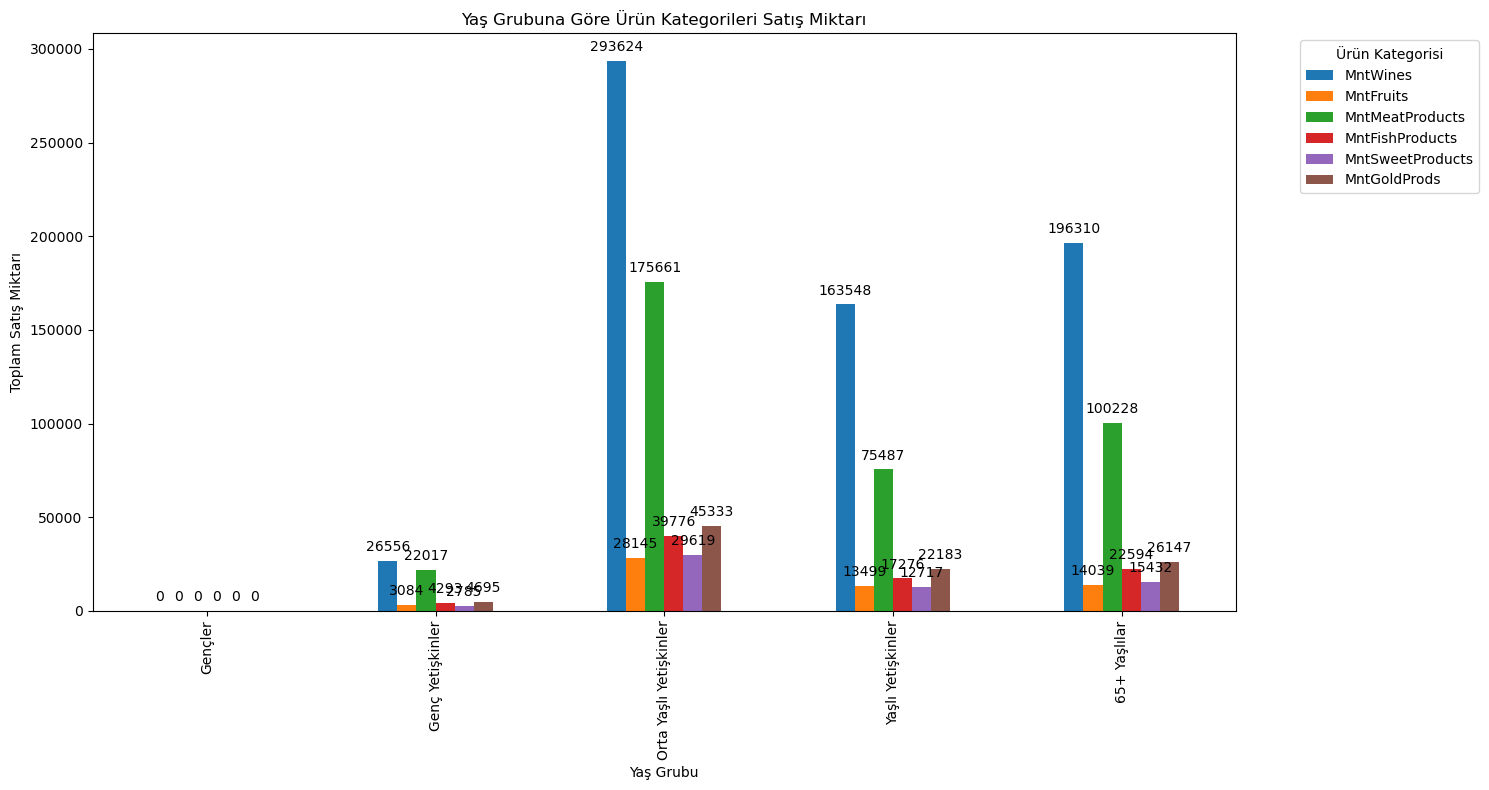

In [89]:
# Yaş Grubuna göre gruplandırma yap
age_grouped = data.groupby('AgeGroup')[product_columns].sum()

# Sonuçları görselleştir
fig, ax = plt.subplots(figsize=(15, 8))
age_grouped.plot(kind='bar', ax=ax)
ax.set_title('Yaş Grubuna Göre Ürün Kategorileri Satış Miktarı')
ax.set_ylabel('Toplam Satış Miktarı')
ax.set_xlabel('Yaş Grubu')
ax.legend(title='Ürün Kategorisi', bbox_to_anchor=(1.05, 1), loc='upper left')

# Barların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

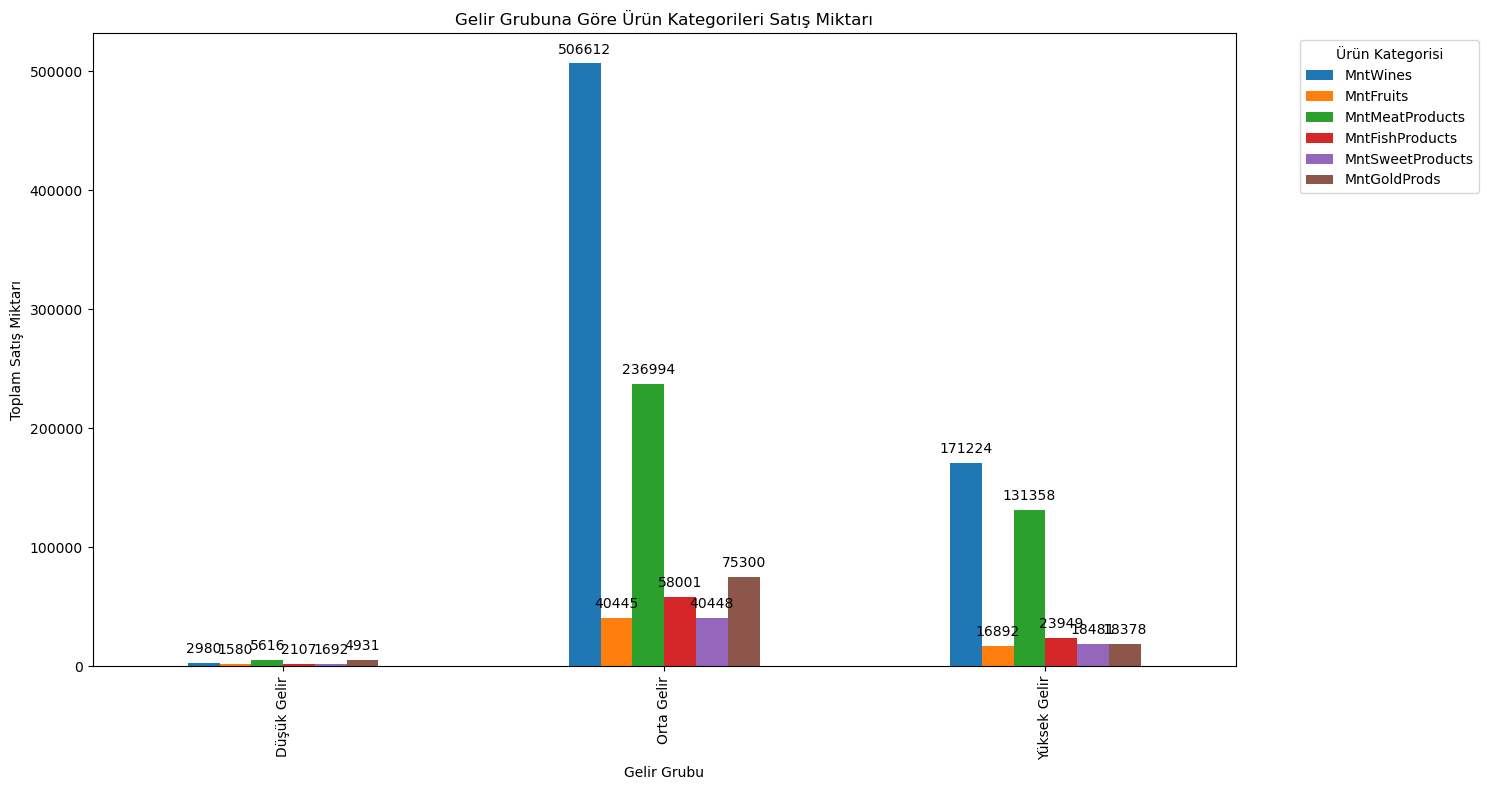

In [90]:
# Gelir Grubuna göre gruplandırma yap
income_grouped = data.groupby('IncomeGroup')[product_columns].sum()

# Sonuçları görselleştir
fig, ax = plt.subplots(figsize=(15, 8))
income_grouped.plot(kind='bar', ax=ax)
ax.set_title('Gelir Grubuna Göre Ürün Kategorileri Satış Miktarı')
ax.set_ylabel('Toplam Satış Miktarı')
ax.set_xlabel('Gelir Grubu')
ax.legend(title='Ürün Kategorisi', bbox_to_anchor=(1.05, 1), loc='upper left')

# Barların üzerine değerleri yaz
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

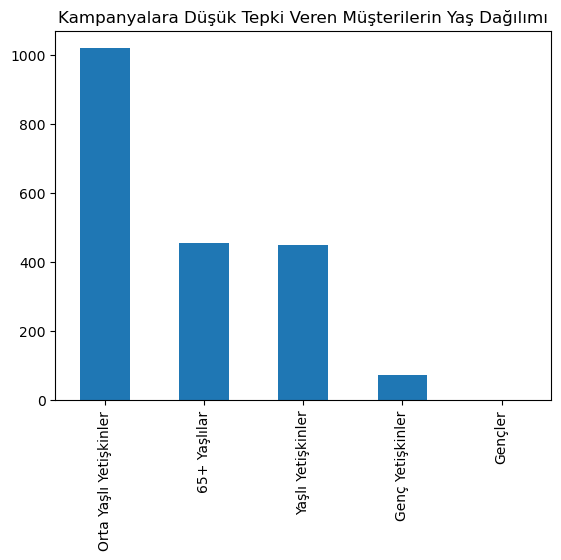

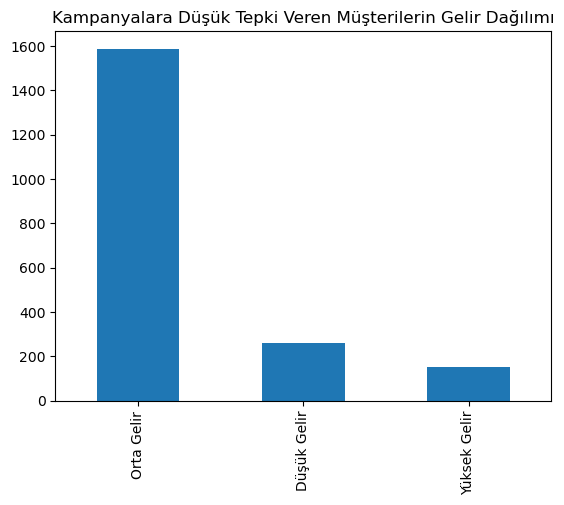

In [92]:
# Kampanya tepki oranları
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
total_responses = data[campaign_columns].sum(axis=1)
data['TotalResponses'] = total_responses

# Düşük tepki veren müşteriler
low_response_customers = data[data['TotalResponses'] <= 1]

# Bu müşterilerin demografik özelliklerine göre dağılımı
low_response_age_dist = low_response_customers['AgeGroup'].value_counts()
low_response_income_dist = low_response_customers['IncomeGroup'].value_counts()

low_response_age_dist.plot(kind='bar', title='Kampanyalara Düşük Tepki Veren Müşterilerin Yaş Dağılımı')
plt.show()

low_response_income_dist.plot(kind='bar', title='Kampanyalara Düşük Tepki Veren Müşterilerin Gelir Dağılımı')
plt.show()

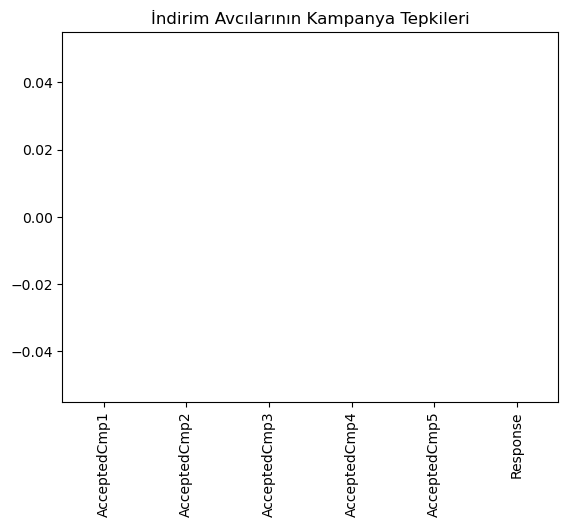

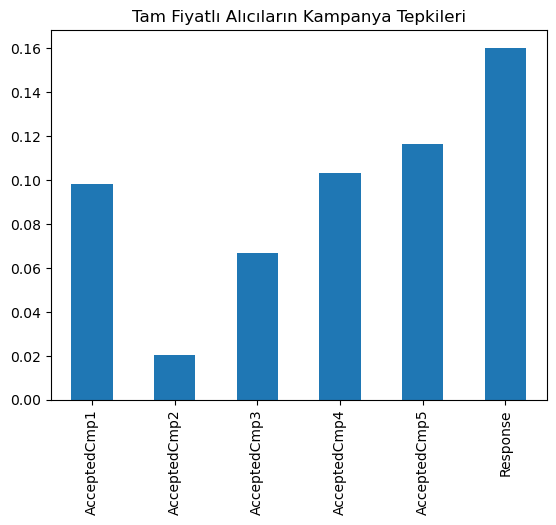

In [93]:
# İndirim avcıları
discount_hunters = data[data['DiscountSegment'] == 'İndirim Avcıları']

# Tam fiyatlı alıcılar
full_price_buyers = data[data['DiscountSegment'] == 'Tam Fiyatlı Alıcılar']

# Bu segmentlerin kampanya tepkilerine göre dağılımı
discount_hunters_response = discount_hunters[campaign_columns].mean()
full_price_buyers_response = full_price_buyers[campaign_columns].mean()

discount_hunters_response.plot(kind='bar', title='İndirim Avcılarının Kampanya Tepkileri')
plt.show()

full_price_buyers_response.plot(kind='bar', title='Tam Fiyatlı Alıcıların Kampanya Tepkileri')
plt.show()

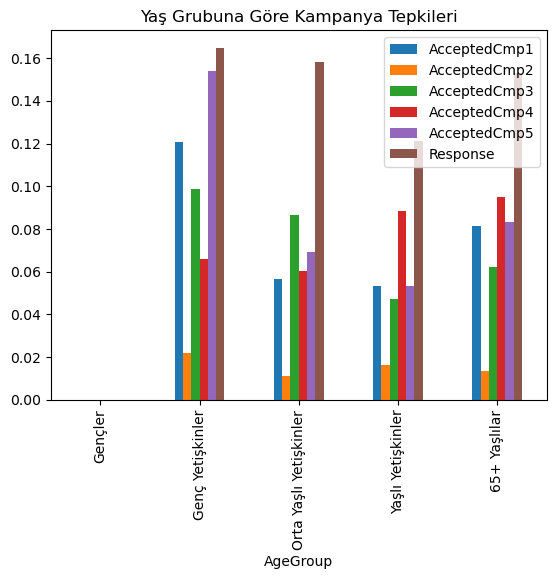

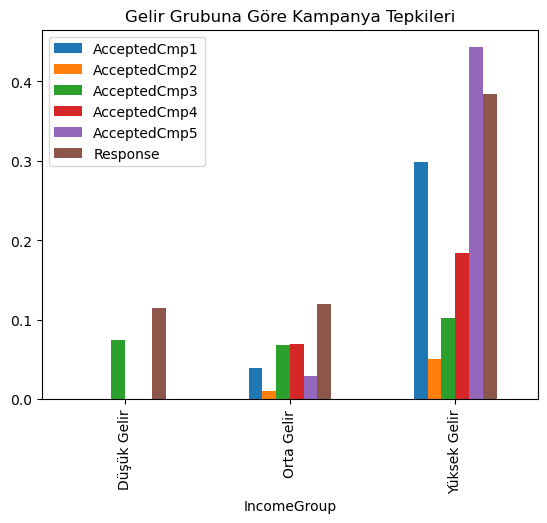

In [94]:
# Yaş grubuna göre kampanya tepkileri
age_group_responses = data.groupby('AgeGroup')[campaign_columns].mean()

# Gelir grubuna göre kampanya tepkileri
income_group_responses = data.groupby('IncomeGroup')[campaign_columns].mean()

age_group_responses.plot(kind='bar', title='Yaş Grubuna Göre Kampanya Tepkileri')
plt.show()

income_group_responses.plot(kind='bar', title='Gelir Grubuna Göre Kampanya Tepkileri')
plt.show()

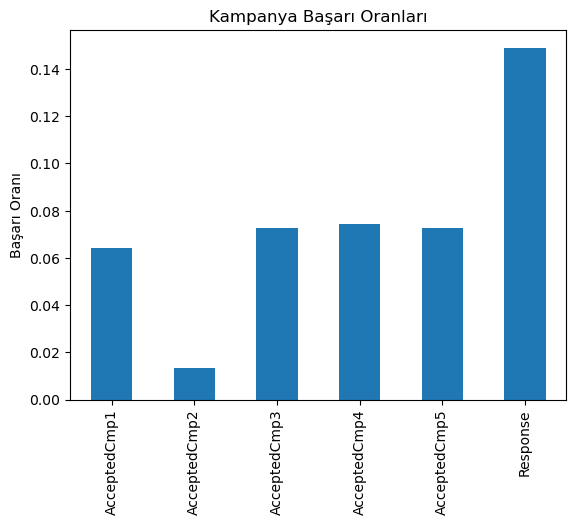

In [95]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_success_rates = data[campaign_columns].mean()

campaign_success_rates.plot(kind='bar', title='Kampanya Başarı Oranları')
plt.ylabel('Başarı Oranı')
plt.show()

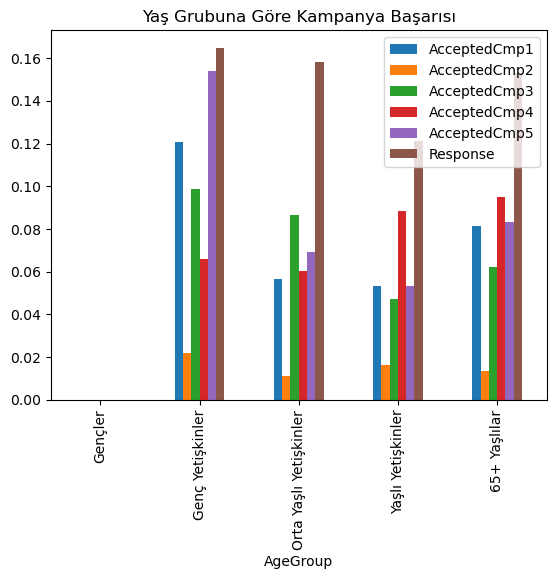

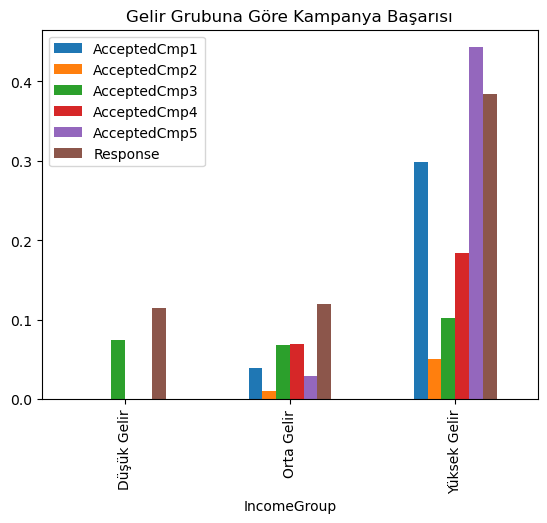

In [96]:
# Yaş grubuna göre kampanya başarısı
age_group_success = data.groupby('AgeGroup')[campaign_columns].mean()

# Gelir grubuna göre kampanya başarısı
income_group_success = data.groupby('IncomeGroup')[campaign_columns].mean()

age_group_success.plot(kind='bar', title='Yaş Grubuna Göre Kampanya Başarısı')
plt.show()

income_group_success.plot(kind='bar', title='Gelir Grubuna Göre Kampanya Başarısı')
plt.show()

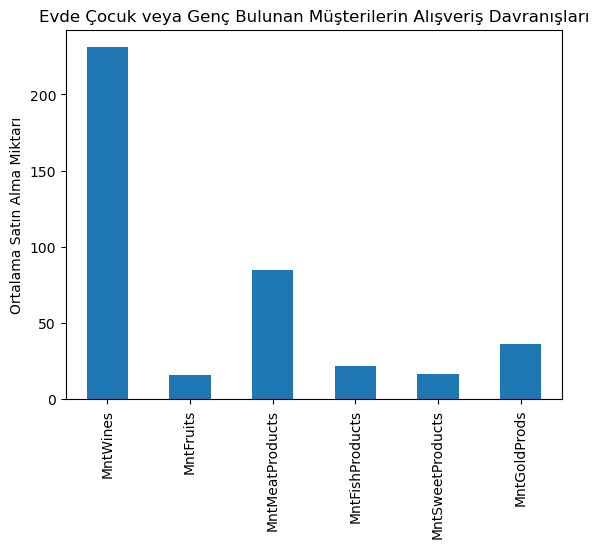

In [98]:
# Evde en az bir çocuk veya genç bulunan müşterileri filtreleme
child_or_teen_at_home = data[(data['Kidhome'] > 0) | (data['Teenhome'] > 0)]

# Ürün kategorilerini belirleyen sütunları seçme
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Evde çocuk veya genç bulunan müşterilerin ortalama satın alma miktarlarını hesaplama
average_purchase = child_or_teen_at_home[product_columns].mean()

# Ortalama satın alma miktarlarını bar grafiği ile gösterme
average_purchase.plot(kind='bar', title='Evde Çocuk veya Genç Bulunan Müşterilerin Alışveriş Davranışları')
plt.ylabel('Ortalama Satın Alma Miktarı')
plt.show()

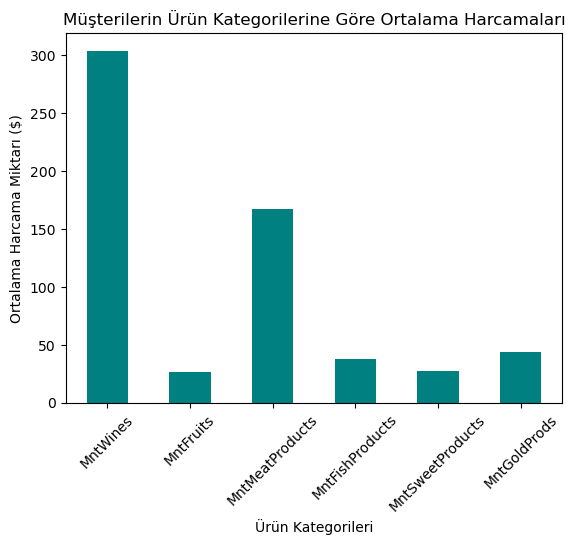

In [99]:
# Ürün kategorilerini belirleyen sütunları seçme
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Tüm müşteriler için ortalama harcama miktarlarını hesaplama
average_spending = data[product_columns].mean()

# Ortalama harcama miktarlarını bar grafiği ile gösterme
average_spending.plot(kind='bar', color='teal', title='Müşterilerin Ürün Kategorilerine Göre Ortalama Harcamaları')
plt.ylabel('Ortalama Harcama Miktarı ($)')
plt.xlabel('Ürün Kategorileri')
plt.xticks(rotation=45)
plt.show()

Web ziyaret sıklığı ile web üzerinden yapılan satın alma arasındaki korelasyon: -0.06


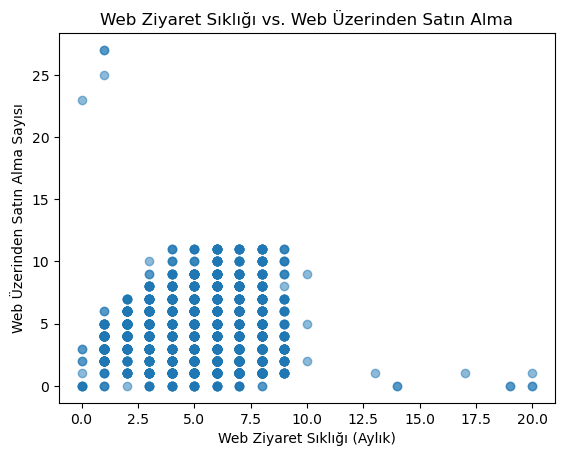

In [101]:
# "NumWebVisitsMonth" ve "NumWebPurchases" sütunları arasındaki korelasyonu hesaplama
correlation = data['NumWebVisitsMonth'].corr(data['NumWebPurchases'])

print(f"Web ziyaret sıklığı ile web üzerinden yapılan satın alma arasındaki korelasyon: {correlation:.2f}")

# Eğer görsel bir temsil istenirse, scatter plot kullanabiliriz:
import matplotlib.pyplot as plt

plt.scatter(data['NumWebVisitsMonth'], data['NumWebPurchases'], alpha=0.5)
plt.title('Web Ziyaret Sıklığı vs. Web Üzerinden Satın Alma')
plt.xlabel('Web Ziyaret Sıklığı (Aylık)')
plt.ylabel('Web Üzerinden Satın Alma Sayısı')
plt.show()

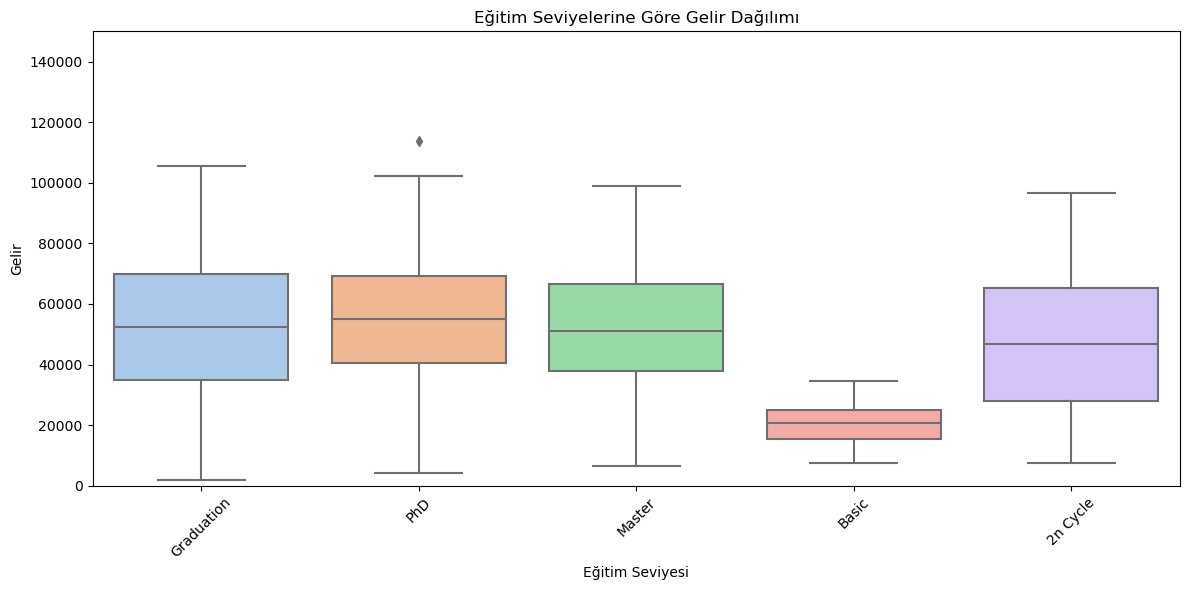

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Income', data=data, palette="pastel")
plt.title('Eğitim Seviyelerine Göre Gelir Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Gelir')
plt.ylim(0, 150000)  # y eksenini 0-100,000 aralığında sınırlama
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

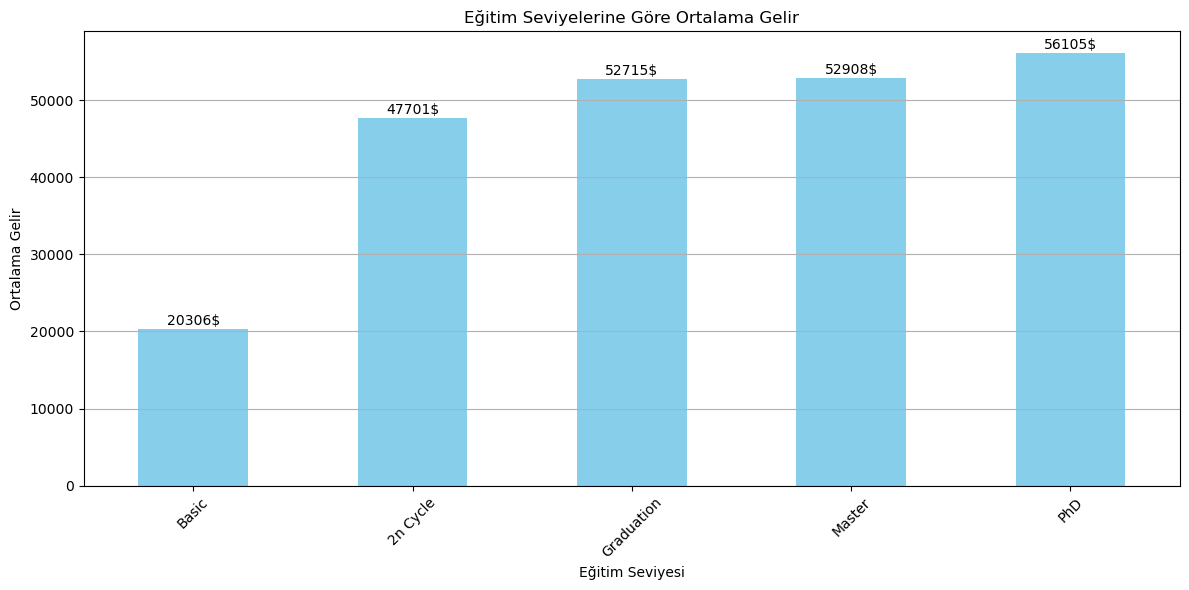

In [103]:
# Eğitim seviyelerine göre ortalama gelirleri hesaplama
average_income_by_education = data.groupby('Education')['Income'].mean().sort_values()

# Ortalama gelirleri bar grafiği ile gösterme
plt.figure(figsize=(12, 6))
average_income_by_education.plot(kind='bar', color='skyblue')
plt.title('Eğitim Seviyelerine Göre Ortalama Gelir')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Ortalama Gelir')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Her bar üzerine değerleri yazma
for index, value in enumerate(average_income_by_education):
    plt.text(index, value + 500, f"{int(value)}$", ha='center')

plt.tight_layout()
plt.show()